# Disorder maps

In [2]:
%cd work/notebooks

/home/jovyan/work/notebooks


In [3]:
# Import modules and R
import numpy as np, pandas as pd
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

In [4]:
import sys, os
sys.path.append('../code')
from processing_helpers import *
from analysis_helpers import *
from mri_maps import *
from gradientVersion import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");
%R source("../code/plot_maps.R");



Attaching package: ‘ggpp’



    annotate


System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down


Project HCP nulls into DK

In [5]:
dme_3d_ds5 = gradientVersion().fit('hcp_3donors_ds5')

New gradients version: method=dm, kernel=normalized_angle, sparsity=0, data=hcp_3donors_ds5


In [9]:
nulls_hcp.shape

(180, 3, 5000)

In [112]:
from brainsmash.mapgen import Base
from brainsmash.mapgen.eval import base_fit
scores = dme_3d_ds5.clean_scores()['G3']
dist_mat=np.loadtxt("../data/parcellations/LeftParcelGeodesicDistmat.txt")
inds = [i-1 for i in scores.index]
dist_mat = dist_mat[inds,:][:,inds]
testmaps = Base(scores.values, dist_mat)(10).T
testmaps = pd.DataFrame(testmaps, index=scores.index).join(get_labels_hcp())
# base_fit(scores.values, dist_mat, nsurr=50, resample=True, pv=50)

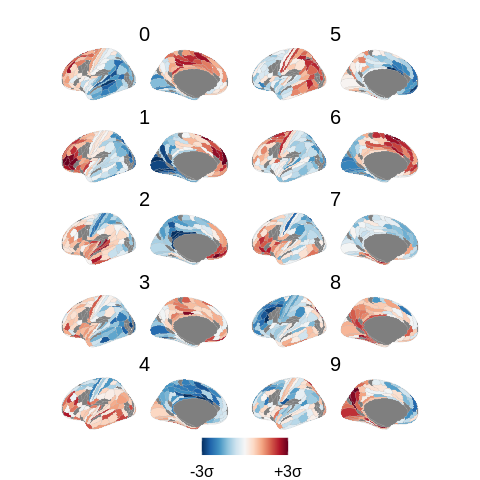

In [113]:
%%R -i testmaps
plot_maps(testmaps, ncol=2)

In [31]:
# nulls_hcp = np.load("../outputs/permutations/hcp_3d_ds5_spin_5000_v2.npy")
nulls_hcp[:,:,0]

array([[-8.83513851e-01,  6.30066002e-01, -1.84096717e-02],
       [ 3.07245963e-01,  2.05329569e+00,  6.01504525e-01],
       [-9.25227208e-01, -6.14367859e-02, -4.94433790e-01],
       [-6.85112926e-01,  7.27677168e-01,  2.28956339e-02],
       [-3.07889187e-01,  1.18654605e+00, -1.81240369e-01],
       [-1.52751178e-01,  1.38245024e+00, -1.24308726e-01],
       [ 3.00644662e-02,  2.11593036e+00,  7.68053838e-01],
       [-5.37512159e-01, -5.51358652e-01, -4.57535222e-01],
       [ 7.53191273e-02, -7.45635851e-01,  1.31435813e-01],
       [-7.82901428e-02, -1.95618358e-01, -6.97677358e-01],
       [ 3.11351716e-01, -1.21095643e-01, -1.17292525e+00],
       [ 9.88031242e-02, -1.64265308e-01, -8.86926549e-01],
       [-1.87869801e-01,  3.57494099e-01, -4.01849267e-01],
       [            nan,             nan,             nan],
       [-6.86344462e-01,  7.58359435e-02, -6.41746160e-01],
       [-6.52346778e-02,  4.22101857e-01, -1.13576051e+00],
       [-9.99280790e-02,  5.82724883e-01

In [118]:
from tqdm import tqdm

nulls_hcp = np.load("../outputs/permutations/hcp_3d_ds5_sim_5000_v3.npy")
n = nulls_hcp.shape[2]
nulls_dk = np.zeros([34,3,n])
for i in tqdm(range(n)):
    nulls_hcp_one = pd.DataFrame(nulls_hcp[:,:,i])
    nulls_dk[:,:,i] = project_to_dk(nulls_hcp_one)

np.save('../outputs/permutations/hcp_3d_ds5_sim_5000_v3_project_to_dk.npy', nulls_dk)

100%|██████████| 5000/5000 [1:10:39<00:00,  1.18it/s]


In [13]:
brainchart_maps = get_disorder_maps().loc[:,['ASD','SCZ','MDD']]

brainchart_maps_versions = pd.concat({
    'raw_centiles': brainchart_maps,
    'z_scores': brainchart_maps.apply(lambda x: x/np.std(x))
}).reset_index().rename({'level_0':'version'}, axis=1)
brainchart_maps_versions

version                       label       ASD       SCZ       MDD
0   raw_centiles                 lh_bankssts -0.010000 -0.078000 -0.008000
1   raw_centiles  lh_caudalanteriorcingulate -0.039000 -0.049000  0.009000
2   raw_centiles      lh_caudalmiddlefrontal -0.033000 -0.088000 -0.011000
3   raw_centiles                   lh_cuneus  0.010000 -0.066000 -0.027000
4   raw_centiles               lh_entorhinal -0.024000 -0.055000 -0.011000
..           ...                         ...       ...       ...       ...
63      z_scores            lh_supramarginal -0.332046 -4.418892 -1.469653
64      z_scores              lh_frontalpole  0.000000 -3.110900 -1.202443
65      z_scores             lh_temporalpole -1.770914 -3.216953 -0.400814
66      z_scores       lh_transversetemporal  2.102960 -4.136083 -0.668024
67      z_scores                   lh_insula -0.442728 -4.772403 -2.404887

[68 rows x 5 columns]

In [133]:
# dm_hcp_3d_ds5 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_3donors_ds5')
# dk_scores = dm_hcp_3d_ds5.score_in_dk()
# dk_null_grads = np.load("../outputs/permutations/sim_dk_5000_from_dm_hcp_3d_ds5.npy")
# dk_null_grads = np.load("../outputs/permutations/sim_dk_5000_from_dm_hcp_3d_ds5__2.npy")
dk_null_grads = np.load(f"../outputs/permutations/spin_dk_5000_dm_hcp_3d_ds5_vertices.npy")
# dk_null_grads = np.load(f"../outputs/permutations/hcp_3d_ds5_sim_5000_v2_project_to_dk.npy")
# dk_null_grads = np.load(f"../outputs/permutations/hcp_3d_ds5_sim_5000_v3_project_to_dk.npy")
# dk_null_grads = np.load(f"../outputs/permutations/hcp_3d_ds5_spin_5000_v2_in_dk.npy")
# dk_null_grads = np.load(f"../outputs/permutations/sim_dk_5000_dm_hcp_3d_ds5_vertices.npy")
# dk_null_grads = np.load(f"../outputs/permutations/hcp_3d_ds5_sim_10000_in_dk.npy")

In [128]:
dm_hcp_3d_ds5.make_null_scores(n=5000, atlas='dk', scores=dk_scores, save_name="sim_dk_5000_from_dm_hcp_3d_ds5__2")

array([[[ 1.17818153,  1.17818153,  1.17818153, ..., -0.38993209,
          0.93418767,  0.79262971],
        [ 1.72959651, -0.29917617, -0.20603179, ..., -0.6854184 ,
         -0.20603179, -0.04320693],
        [-1.95646371, -1.04980065, -0.79816449, ...,  1.40441827,
          0.87839754, -0.69628348]],

       [[-0.46626374, -1.09335243, -0.89203767, ..., -0.06995373,
         -0.1351078 , -0.28468309],
        [ 1.17210327,  0.1897472 , -0.01469139, ..., -0.02504179,
          0.1897472 , -0.02504179],
        [-0.0334302 ,  1.37116637,  0.85276777, ...,  1.28337083,
          1.28337083,  1.37116637]],

       [[-0.38993209, -1.74171256, -0.96918316, ..., -0.25552465,
         -0.38993209,  0.7343133 ],
        [-0.6854184 , -1.65921123,  1.13506886, ...,  1.32179542,
         -0.93648848,  0.52143768],
        [ 1.40441827,  1.28337083,  0.52653542, ..., -1.95646371,
         -0.96755384,  0.87839754]],

       ...,

       [[-1.74171256, -0.27591448, -0.28468309, ...,  1.1781815

In [134]:
corrs = get_corrs(dk_scores, brainchart_maps, method='pearson')
brainchart_null_p = corr_nulls_from_grads(dk_null_grads, dk_scores, brainchart_maps, method='pearsonr', adjust_by_label=True)
brainchart_null_p

G  map         r         p         q
0  G1  ASD  0.473475  0.000200  0.000600
1  G1  SCZ  0.003582  0.991202  0.991202
2  G1  MDD -0.283789  0.137772  0.206659
3  G2  ASD -0.274463  0.000800  0.002400
4  G2  SCZ -0.242277  0.575285  0.575285
5  G2  MDD  0.214395  0.244151  0.366227
6  G3  ASD -0.081886  0.743451  0.743451
7  G3  SCZ -0.435330  0.007798  0.023395
8  G3  MDD -0.129665  0.540092  0.743451

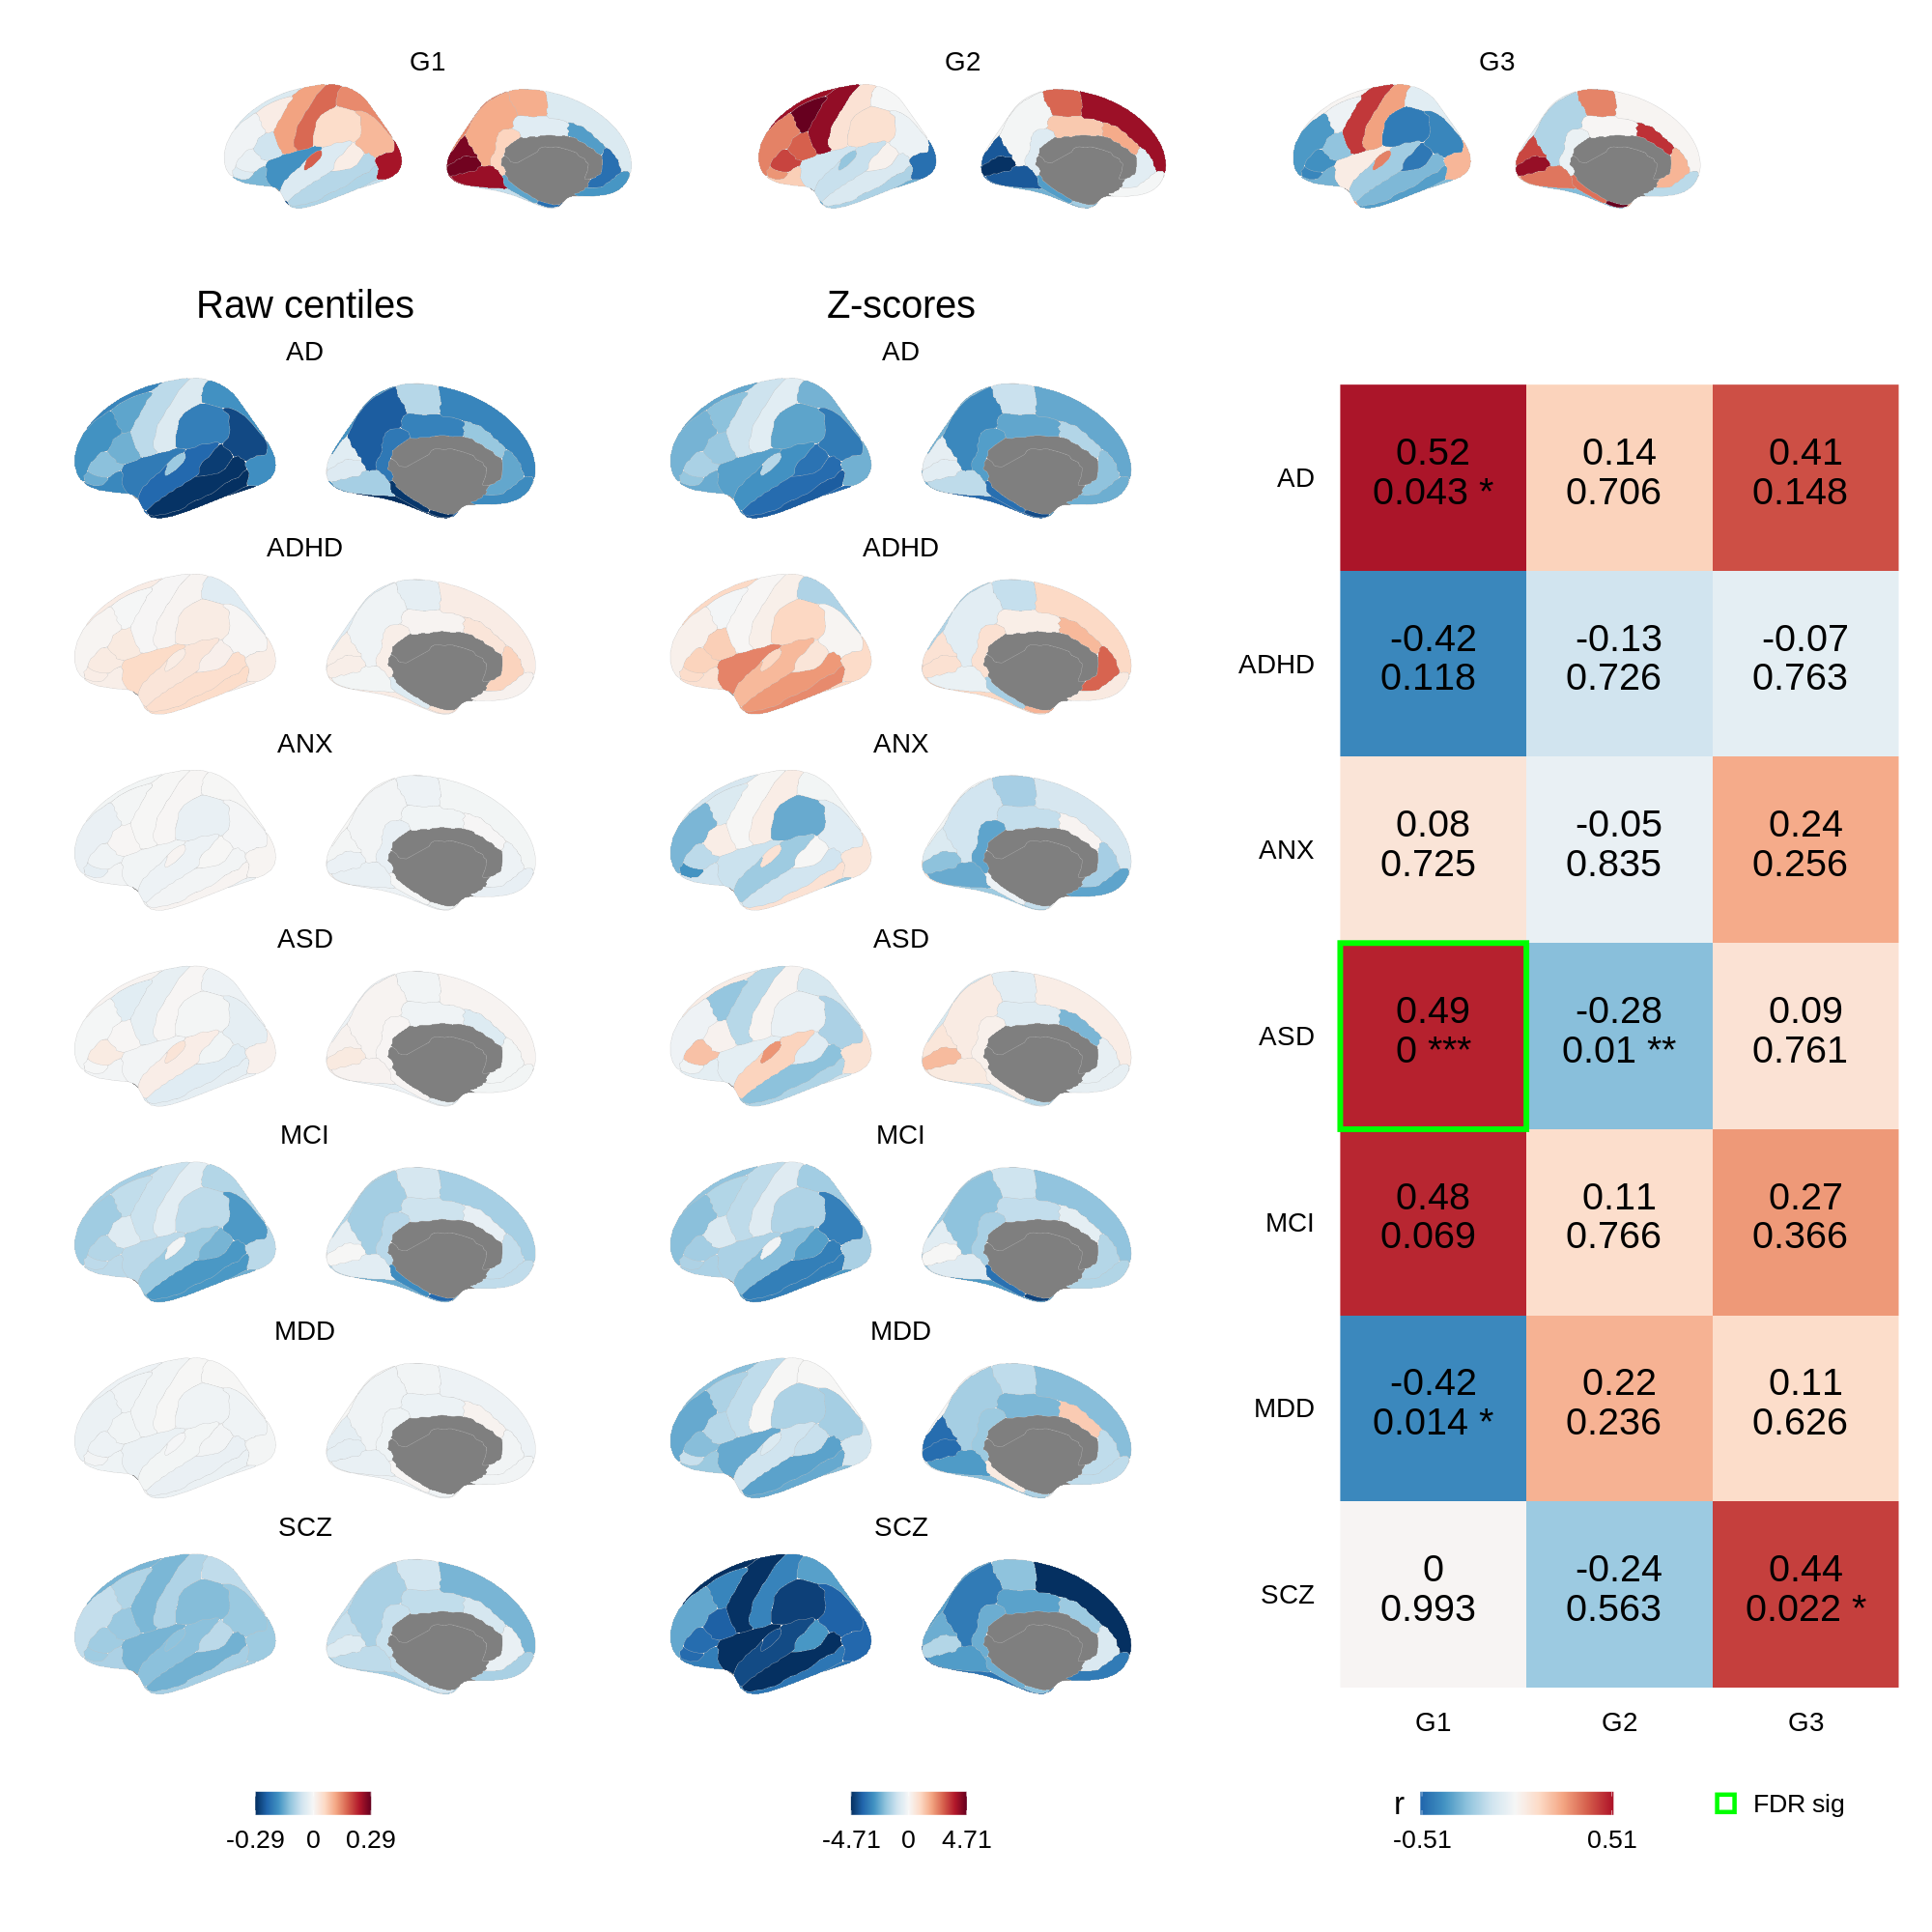

In [73]:
%%R -i brainchart_null_p -i brainchart_maps_versions -i dk_scores -w 20 -h 20 --units in -r 100
source("../code/plot_maps.R")
g0 <- plot_dk_wide(dk_scores) + guides(fill='none')
g1 <- plot_dk(brainchart_maps_versions %>% filter(version=='raw_centiles'), facet='w') + ggtitle('Raw centiles')
g2 <- plot_dk(brainchart_maps_versions %>% filter(version=='z_scores'), facet='w') + ggtitle('Z-scores')
g3 <- plot_corr_versions(brainchart_null_p %>% mutate(version=''), size=10) + theme(axis.text=element_text(size=20,color='black'))
((g0 / (g1 + g2 + g3)) + plot_layout(heights=c(1,10))) & theme(strip.text=element_text(size=24),text=element_text(size=24))


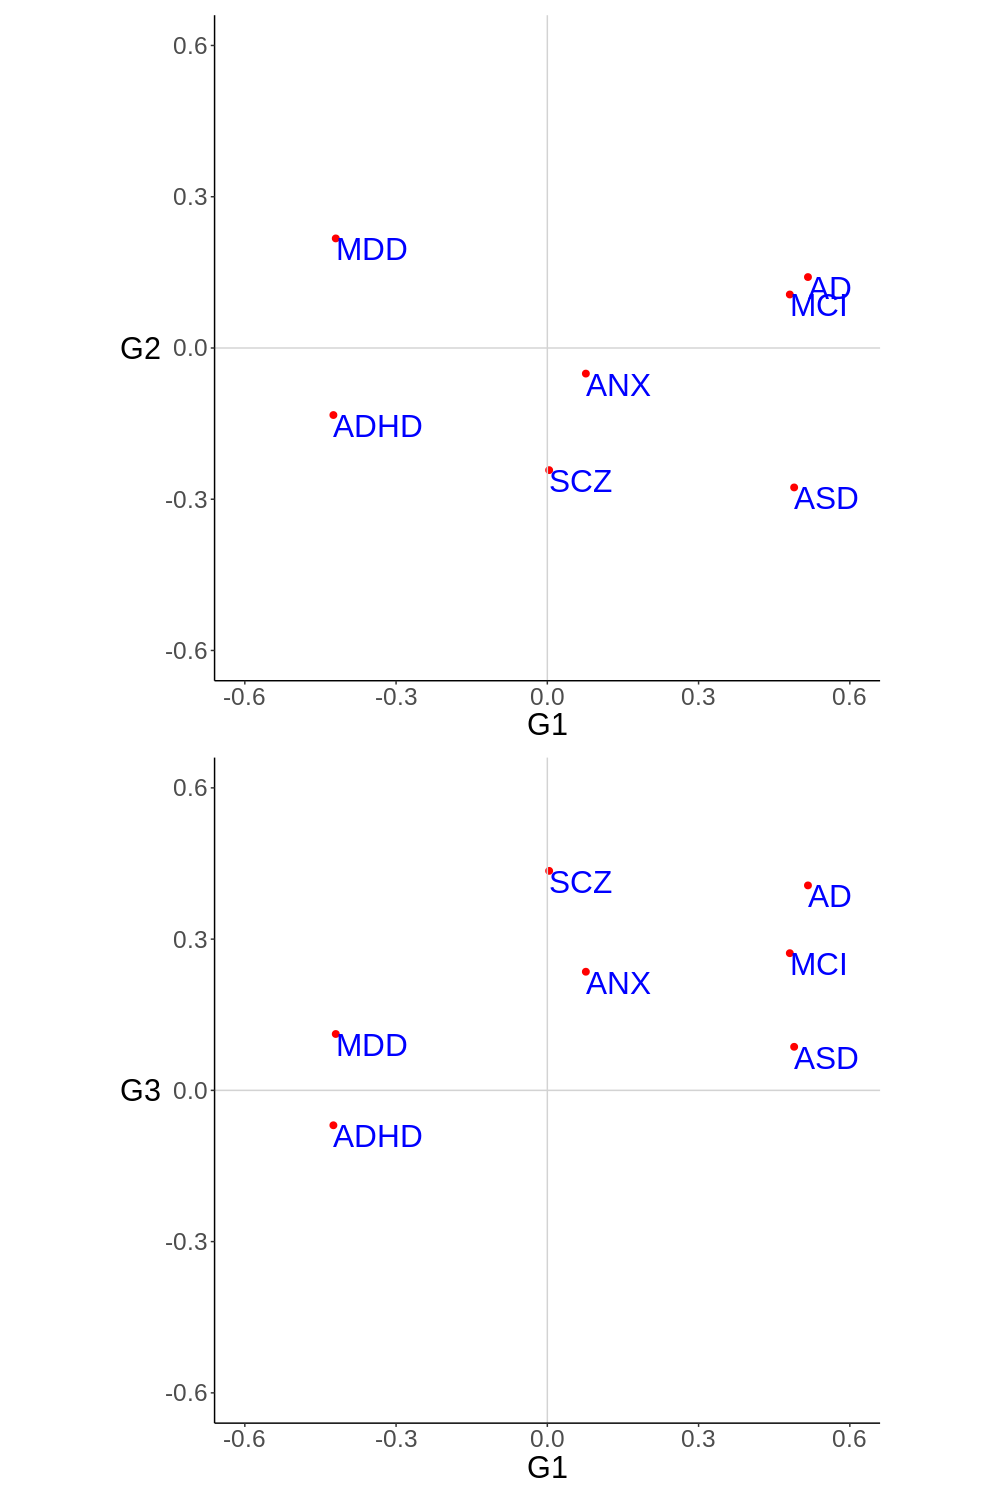

In [101]:
%%R -i brainchart_null_p -w 10 -h 15 -u in -r 100
g1 <- brainchart_null_p %>% 
pivot_wider(id_cols=map, names_from=G, values_from=r) %>% 
ggplot(aes(x=G1,y=G2)) + 
labs('G1','G2') +
geom_point(size=2, color='red') + 
geom_vline(xintercept=0, color='lightgrey') +
geom_hline(yintercept=0, color='lightgrey') +
geom_text(aes(label=map), size=8, vjust=1, hjust=0, color='blue')

g2 <- brainchart_null_p %>% 
pivot_wider(id_cols=map, names_from=G, values_from=r) %>% 
ggplot(aes(x=G1,y=G3)) + 
labs('G1','G3') +
geom_point(size=2, color='red') + 
geom_vline(xintercept=0, color='lightgrey') +
geom_hline(yintercept=0, color='lightgrey') +
geom_text(aes(label=map), size=8, vjust=1, hjust=0, color='blue')

(g1 / g2) & xlim(-.6, .6) & ylim(-.6, .6) & theme_classic() &
    theme(
        aspect.ratio=1,
        text=element_text(size=22),
        axis.title.y=element_text(angle=0, vjust=.5)
        )

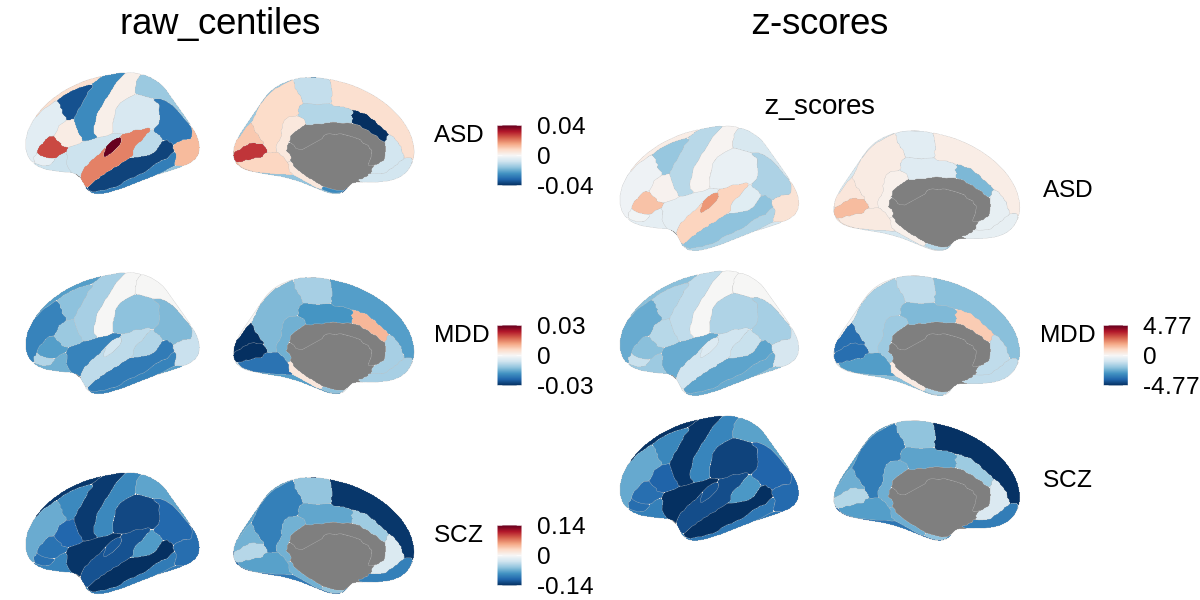

In [19]:
%%R -w 12 -h 6 --units in -r 100 -i brainchart_maps_versions
g1a <- brainchart_maps_versions %>% filter(version=='raw_centiles') %>% select(label, ASD) %>% plot_dk() + ggtitle('raw_centiles')
g1b <- brainchart_maps_versions %>% filter(version=='raw_centiles') %>% select(label, MDD) %>% plot_dk()
g1c <- brainchart_maps_versions %>% filter(version=='raw_centiles') %>% select(label, SCZ) %>% plot_dk()
g2 <- brainchart_maps_versions %>% filter(version=='z_scores') %>% plot_dk() + ggtitle('z-scores')

((g1a/g1b/g1c) | g2) & guides(fill=guide_colorbar(barheight=3)) & 
    theme(legend.position='right', text=element_text(size=22), plot.margin=margin(0,0,0,0))

In [29]:
corr_nulls_from_grads(nulls_ds5['hcp_ds5 -> spin_5000 -> dk'], dk_scores, maps, method='pearsonr')

G  map         r         p         q
0  G1  ASD  0.489567  0.000200  0.001800
1  G1  MDD -0.419630  0.013997  0.041992
2  G1  SCZ  0.003598  0.993001  0.993001
3  G2  ASD -0.276612  0.009998  0.041992
4  G2  MDD  0.217303  0.236353  0.425435
5  G2  SCZ -0.242285  0.563487  0.804696
6  G3  ASD  0.086379  0.761448  0.856629
7  G3  MDD  0.111831  0.625875  0.804696
8  G3  SCZ  0.435328  0.021996  0.049490

## Get disorder maps

In [12]:
maps = get_disorder_maps()
maps = maps.loc[:, lambda x: ~np.isin(x.columns, ['AD', 'ANX', 'MCI', 'ADHD'])]
maps.head()

ASD    MDD    SCZ
label                                          
lh_bankssts                -0.010 -0.008 -0.078
lh_caudalanteriorcingulate -0.039  0.009 -0.049
lh_caudalmiddlefrontal     -0.033 -0.011 -0.088
lh_cuneus                   0.010 -0.027 -0.066
lh_entorhinal              -0.024 -0.011 -0.055

## Get scores in DK

In [5]:
dm_hcp_3d_ds5 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_3donors_ds5')
scores_ds5 = dm_hcp_3d_ds5.score_in_dk()

dm_hcp_ds8 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_ds8')
scores_ds8 = dm_hcp_ds8.score_in_dk()

New gradients version: method=dm, params={'alpha': 1}, kernel=normalized_angle, sparsity=0, data=hcp_3donors_ds5
New gradients version: method=dm, params={'alpha': 1}, kernel=normalized_angle, sparsity=0, data=hcp_ds8


In [13]:
correlate(scores_ds5.iloc[:,:3], scores_ds8)

G1        G2        G3
G1  0.996013 -0.119509  0.148676
G2 -0.215169  0.957937  0.051325
G3  0.172886 -0.540496  0.903425

## Compute correlations using different nulls

In [7]:
nulls_ds5 = {
    'hcp_ds5 -> sim_5000 -> dk': np.load("../outputs/permutations/hcp_3d_ds5_sim_5000_in_dk.npy"),
    'hcp_ds5 -> spin_5000 -> dk': np.load("../outputs/permutations/hcp_3d_ds5_spin_5000_in_dk.npy"),
    'hcp_ds5 -> dk -> sim_5000': np.load("../outputs/permutations/sim_dk_5000_dm_hcp_3d_ds5_vertices.npy"),
    'hcp_ds5 -> dk -> spin_5000': np.load("../outputs/permutations/spin_dk_5000_dm_hcp_3d_ds5_vertices.npy")
}

nulls_ds8 = {
    'hcp_ds8 -> sim_5000 -> dk': np.load("../outputs/permutations/hcp_ds8_sim_5000_in_dk.npy"),
    'hcp_ds8 -> spin_5000 -> dk': np.load("../outputs/permutations/hcp_ds8_spin_5000_in_dk.npy"),
    'hcp_ds8 -> dk -> sim_5000': np.load("../outputs/permutations/sim_dk_5000_dm_hcp_ds8_vertices.npy"),
    'hcp_ds8 -> dk -> spin_5000': np.load("../outputs/permutations/spin_dk_5000_dm_hcp_ds8_vertices.npy")
}

In [8]:
null_corrs_dict_ds5 = {name: corr_nulls_from_grads(nulls, scores_ds5, maps) for name, nulls in nulls_ds5.items()}
null_corrs_dict_ds8 = {name: corr_nulls_from_grads(nulls, scores_ds8, maps) for name, nulls in nulls_ds8.items()}

KeyboardInterrupt: 

In [11]:
corr_nulls_from_grads(nulls_ds5['hcp_ds5 -> spin_5000 -> dk'], scores_ds5, maps)

G  map         r         p         q
0  G1  ASD  0.489567  0.000200  0.001800
1  G1  MDD -0.419630  0.013997  0.041992
2  G1  SCZ  0.003598  0.993001  0.993001
3  G2  ASD -0.276612  0.009998  0.041992
4  G2  MDD  0.217303  0.236353  0.425435
5  G2  SCZ -0.242285  0.563487  0.804696
6  G3  ASD  0.086379  0.761448  0.856629
7  G3  MDD  0.111831  0.625875  0.804696
8  G3  SCZ  0.435328  0.021996  0.049490

In [26]:
null_corrs_dict = {**null_corrs_dict_ds5, **null_corrs_dict_ds8}
corr_versions = {version:stats for version, stats in null_corrs_dict.items()}
corr_versions = pd.concat(corr_versions).reset_index().set_axis(['version','G','map','r','p','q'], axis=1)

In [33]:
corr_versions = corr_versions.set_index('version').loc[list(nulls_ds5.keys())+list(nulls_ds8.keys())].reset_index()

In [34]:
save_pickle(corr_versions, 'corr_versions_disorders')

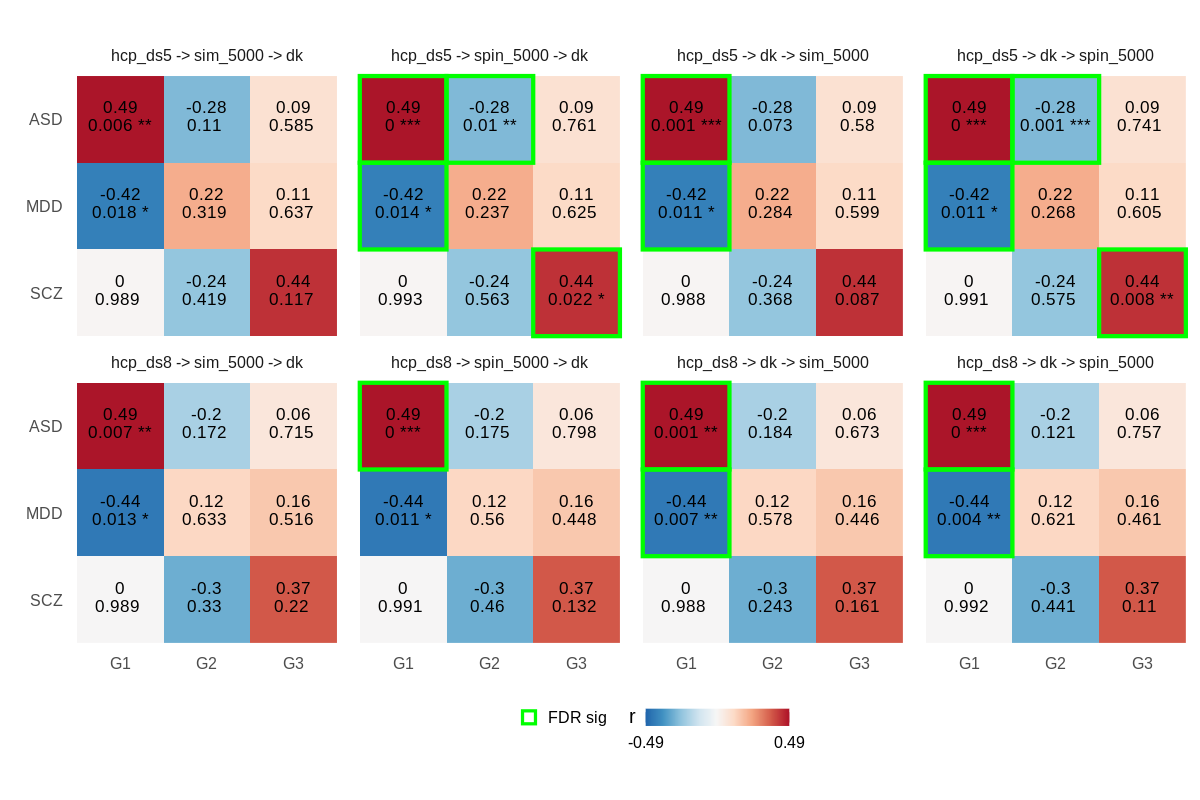

In [37]:
%%R -i corr_versions -w 1200 -h 800
source("../code/plot_maps.R")
plot_corr_versions(corr_versions, facet='w', nrow=2)

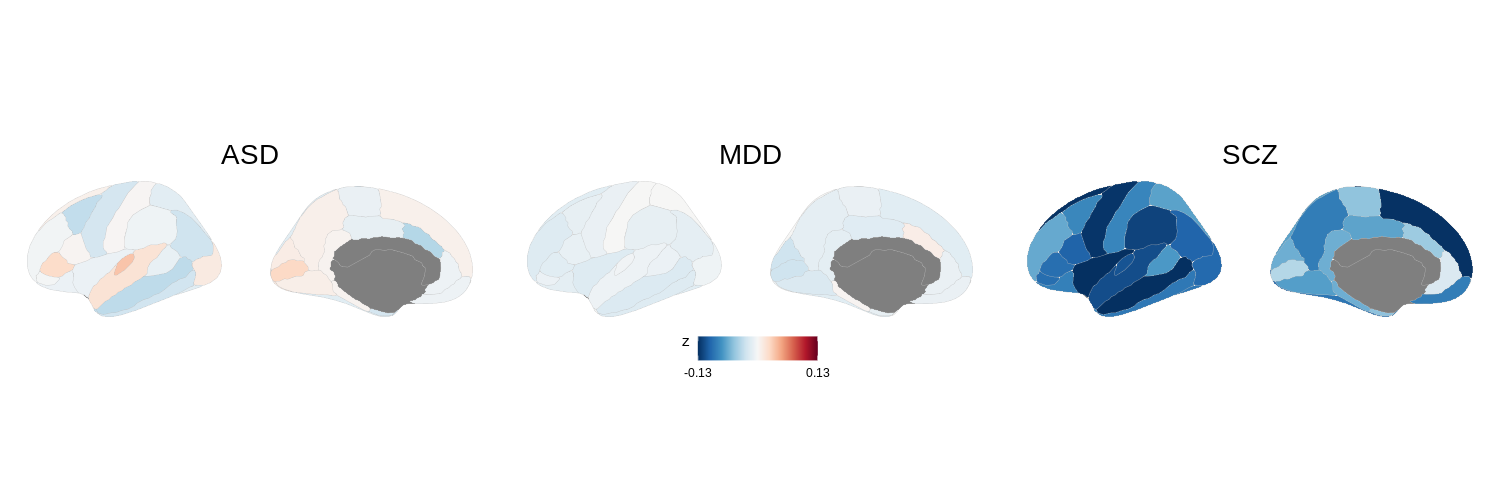

In [44]:
%%R -i scores_ds8 -i scores_ds5 -i maps -w 15 -h 5 --units in -r 100
# plot_dk(scores_ds5, facet='w')
plot_maps_dk(maps)

## Project all HCP nulls to DK

More reliable than making nulls in DK?

In [3]:
dm_hcp_3d_ds5 = gradientVersion().fit('hcp_3donors_ds5')

New gradients version: method=dm, params={'alpha': 1}, kernel=normalized_angle, sparsity=0, data=hcp_3donors_ds5


In [5]:
hcp_nulls = np.load('../outputs/permutations/hcp_3d_ds5_sim_10000.npy')

Project into dk

In [ ]:
n = hcp_nulls.shape[2]
dk_nulls = np.zeros((34,3,n))
for i in range(n):
    index = dm_hcp_3d_ds5.scores.index # Get non-missing labels
    hcp_null_scores = pd.DataFrame(hcp_nulls[:,:,i], index=index)
    dk_nulls[:,:,i] = project_to_dk(hcp_null_scores)

np.save('../outputs/permutations/hcp_3d_ds5_sim_10000_in_dk.npy', dk_nulls)


## Make distance matrix for DK atlas

Only need to do this once

In [4]:
# from brainsmash.workbench.geo import parcellate
# infile = "/home/rajd2/rds/rds-cam-psych-transc-Pb9UGUlrwWc/Cam_LIBD/AHBA_data/LeftDenseGeodesicDistmat.txt"
# outfile = "../data/LeftParcelGeodesicDistmat_DK.txt"
# dlabel = "../data/fsaverage.aparc.32k_fs_L.dlabel.nii"
# parcellate(infile, dlabel, outfile)

---

In [12]:
pca_dk_ds5 = gradientVersion(approach='pca').fit('dk_ds5')

New gradients version: method=pca, params={}, kernel=normalized_angle, sparsity=0, data=dk_ds5


In [32]:
from sklearn.cross_decomposition import PLSCanonical
X = pca_dk_ds5.expression
Y = maps['SCZ']
scz_weights = PLSCanonical(n_components=1).fit(X,Y).x_weights_

In [34]:
scz_weights = pd.Series(scz_weights.squeeze(), index=X.columns)

In [20]:
from disorders import *
gandal_genes = get_gandal_genes()
disorders = ['ASD','MDD','SCZ']

In [22]:
dm_hcp_3d_ds5 = gradientVersion().fit('hcp_3donors_ds5')
weights = dm_hcp_3d_ds5.weights

New gradients version: method=dm, params={'alpha': 1}, kernel=normalized_angle, sparsity=0, data=hcp_3donors_ds5


In [23]:
gandal_fdr = (gandal_genes
              .loc[:,[f'{d}.FDR' for d in disorders]]
              .melt(ignore_index=False, var_name='disorder', value_name='FDR')
              # .loc[lambda x: x['FDR']]
              .assign(disorder = lambda x: x['disorder'].str.replace('.FDR','', regex=False))
              .set_index('disorder', append=True)
             )

gandal_log2FC = (gandal_genes
              .loc[:,[f'{d}.log2FC' for d in disorders]]
              .melt(ignore_index=False, var_name='disorder', value_name='log2FC')
              .assign(disorder = lambda x: x['disorder'].str.replace('.log2FC','', regex=False))
              .set_index('disorder', append=True)
              .join(gandal_fdr)
              .reset_index('disorder')
              .loc[lambda x: x['FDR'] < 0.05]
             )

weights_labels = (weights
                  .join(gandal_log2FC)     
                  .rename({'disorder':'label'}, axis=1)                   
                  .fillna({'label':'none'})
                  .assign(cluster = lambda x: np.select([x['log2FC']>0,x['log2FC']<0], ['upregulated','downregulated'], default=None)) 
                  # .drop(['sig'], axis=1)
                 )
weights_labels

0         1         2         3         4 label    log2FC  \
A1BG     -0.015451 -0.004935  0.000699  0.016858  0.006289  none       NaN   
A1BG-AS1 -0.011982 -0.001215 -0.016185  0.007906  0.010129  none       NaN   
AAAS      0.011610  0.004924  0.002747  0.021268  0.015138  none       NaN   
AAED1    -0.013839 -0.000380  0.008323  0.002260  0.008065  none       NaN   
AAGAB    -0.005098  0.019883 -0.014753  0.008614 -0.010403  none       NaN   
...            ...       ...       ...       ...       ...   ...       ...   
ZSWIM9   -0.009991  0.000472  0.002506 -0.019020  0.018501  none       NaN   
ZWINT    -0.012440 -0.008334  0.000574  0.004192  0.005409  none       NaN   
ZYX       0.017013  0.005947 -0.003734  0.009057 -0.000945   SCZ -0.054705   
ZZEF1     0.013004 -0.012944  0.009703 -0.000583  0.013878  none       NaN   
ZZZ3     -0.010819 -0.004823  0.001800  0.015273  0.016162   SCZ  0.056258   

               FDR        cluster  
A1BG           NaN           None  
A1BG-AS1       NaN           None  
AAAS           NaN           None  
AAED1          NaN           None  
AAGAB          NaN           None  
...            ...            ...  
ZSWIM9         NaN           None  
ZWINT          NaN           None  
ZYX       0.019563  downregulated  
ZZEF1          NaN           None  
ZZZ3      0.045840    upregulated  

[8321 rows x 9 columns]

In [45]:
(weights_labels.loc[lambda x: x['label']=='SCZ']
 .join(scz_weights.rename('SCZ_PLS_weights')).corr()
 .loc['SCZ_PLS_weights'].drop(['FDR',3,4,'SCZ_PLS_weights'])
)

0         0.116266
1         0.460877
2        -0.746020
log2FC   -0.529059
Name: SCZ_PLS_weights, dtype: float64

---

## Get gradients

In [6]:
# pca_dk_ds9 = gradientVersion(approach='pca').fit('dk_ds9')
# dm_dk_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('dk_ds9')
# dm_dk_ds5 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('dk_ds5')

# dm_hcp_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_ds9')
# dm_hcp_ds8 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_ds8')
dm_hcp_3d_ds5 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_3donors_ds5')

New gradients version: method=dm, params={'alpha': 1}, kernel=normalized_angle, sparsity=0, data=hcp_3donors_ds5


Translate HCP gradient scores into DK using Neuromaps

In [8]:
dk_scores = dm_hcp_3d_ds5.score_in_dk()

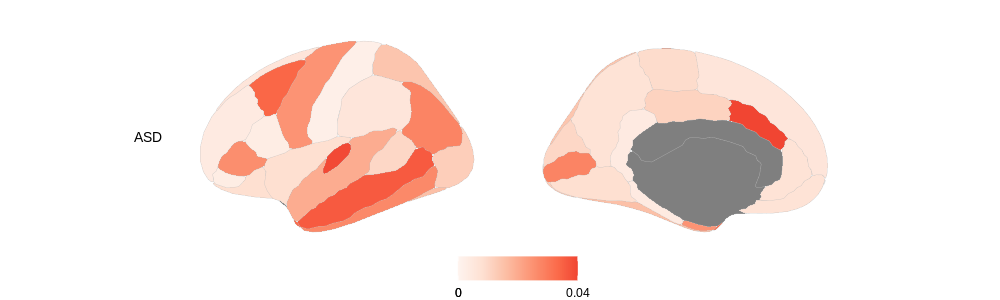

In [82]:
%%R -i dk_scores -i maps -w 10 -h 3 --units in -r 100
# %%R -i dk_scores -i maps -w 5 -h 10 --units in -r 100

source("../code/brainPlots.R")
source("../code/plot_maps.R")
library(dplyr)
# plot_dk(dk_scores, switch='y') / plot_maps_dk(maps, ncol=1, colors=rev(brewer.puor(100)), facet='v')
plot_maps_dk(maps %>% select(ASD), ncol=1, colors=brewer.reds(100)[1:60], facet='v', colorscale='zero')

In [66]:
dk_scores_dict = {
    # 'dm_hcp_ds8_vertices': dm_hcp_ds8.score_in_dk(),
    # 'dm_hcp_ds9_vertices': dm_hcp_ds9.score_in_dk(),
    'dm_hcp_3d_ds5_vertices': dm_hcp_3d_ds5.score_in_dk()
}

dk_scores = (pd.concat(dk_scores_dict)
             .reset_index(0)
             .rename({'level_0':'version'}, axis=1)
            )

In [27]:
for name, scores in {name:scores for name,scores in dk_scores_dict.items() if 'vertices' in name}.items():
    generate_spins_from_gradients(scores, n=100, outfile=f'../outputs/permutations/spin_dk_100_{name}.npy', atlas='dk')
    print(f'Made spins for {name}')

KeyboardInterrupt: 

In [27]:
for name, scores in {name:scores for name,scores in dk_scores_dict.items() if 'vertices' in name}.items():
    generate_spins_from_gradients(scores, n=10000, outfile=f'../outputs/permutations/spin_dk_100_{name}.npy', atlas='dk')
    print(f'Made spins for {name}')

KeyboardInterrupt: 

In [22]:
for name, scores in {name:scores for name,scores in dk_scores_dict.items() if 'vertices' in name}.items():
    generate_simulations(scores, n=10000, outfile=f'../outputs/permutations/sim_dk_10000_{name}.npy', atlas='dk')
    print(f'Made sims for {name}')

Made sims for dm_hcp_3d_ds5_vertices


In [32]:
for name, scores in {name:scores for name,scores in dk_scores_dict.items() if 'vertices' in name}.items():
    generate_shuffles(scores, n=5000, outfile=f'../outputs/permutations/shuffle_dk_5000_{name}.npy')
    print(f'Made shuffles for {name}')

Made shuffles for dm_hcp_3d_ds5_vertices


In [31]:
# null_corrs_dict = {}
# for name, scores in dk_scores_dict.items():
#     sim_grads = np.load(f"../outputs/permutations/sim_gradients_dk_1000_{name}.npy")
#     spin_grads = np.load(f"../outputs/permutations/spin_gradients_dk_1000_{name}.npy")    
#     null_corrs_dict[name] = corr_nulls_from_grads(spin_grads, scores, maps, method='pearson')

In [62]:
shuffle_grads = np.load(f"../outputs/permutations/shuffle_dk_5000_dm_hcp_3d_ds5_vertices.npy")    
spin_grads = np.load(f"../outputs/permutations/spin_dk_5000_dm_hcp_3d_ds5_vertices.npy")
hcp_sim_grads = np.load(f"../outputs/permutations/hcp_3d_ds5_sim_1000_in_dk.npy")


In [63]:
null_corrs_dict = {
    'Random null': corr_nulls_from_grads(shuffle_grads, dk_scores, maps, method='pearson'),
    'Spin null': corr_nulls_from_grads(spin_grads, dk_scores, maps, method='pearson'),
    'HCP sim null': corr_nulls_from_grads(hcp_sim_grads, dk_scores, maps, method='pearson')
}

In [64]:
corr_versions = {}
for name, null_corrs in null_corrs_dict.items():
    corrs = get_corrs(dk_scores, maps, atlas='dk')#.loc[lambda x: ~np.isin(x.index, ['ANX', 'MCI', 'ADHD'])]
    null_corrs = null_corrs_dict[name]#.loc[lambda x: ~np.isin(x['map'], ['ANX', 'MCI', 'ADHD'])]
    corr_versions[name] = get_null_p(corrs, null_corrs, adjust='fdr_bh')

names_dict = {
    # 'dm_hcp_ds9_vertices': 'DM HCP DS9 -> DK (vertices)',
    'dm_hcp_3d_ds5_vertices': 'DM HCP 3+ DS5 -> DK (vertices)'
}
    
corr_versions = pd.concat(corr_versions).reset_index(0).rename({'level_0':'version'},axis=1)
        # .assign(version = lambda x: pd.Categorical(x['version'].replace(names_dict), ordered=True, categories=names_dict.values()))

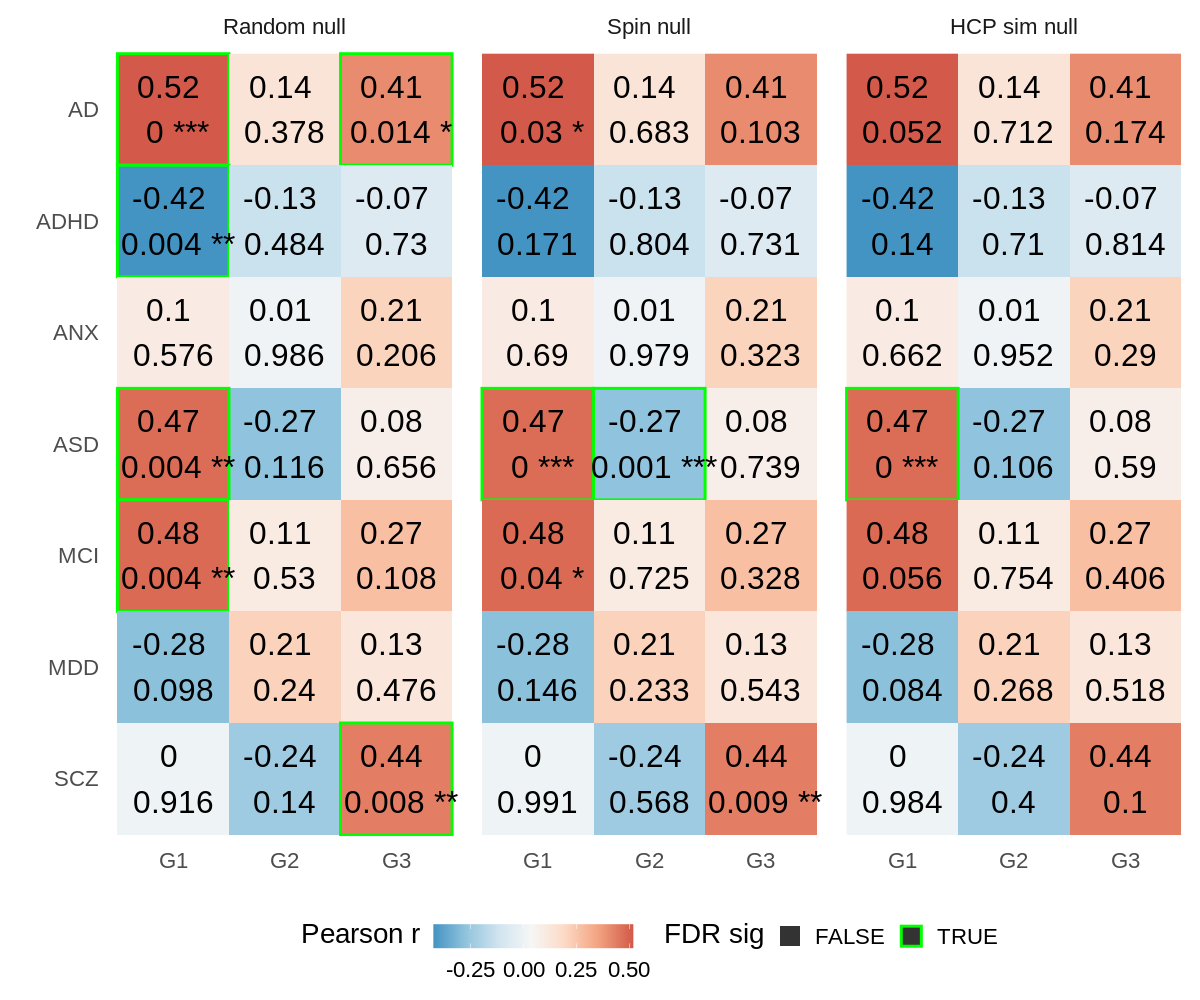

In [65]:
%%R -i corr_versions -i maps -i dk_scores -w 12 -h 10 --units in -r 100
source("../code/plot_maps.R")
plot_corr_versions_2(corr_versions, size=8)

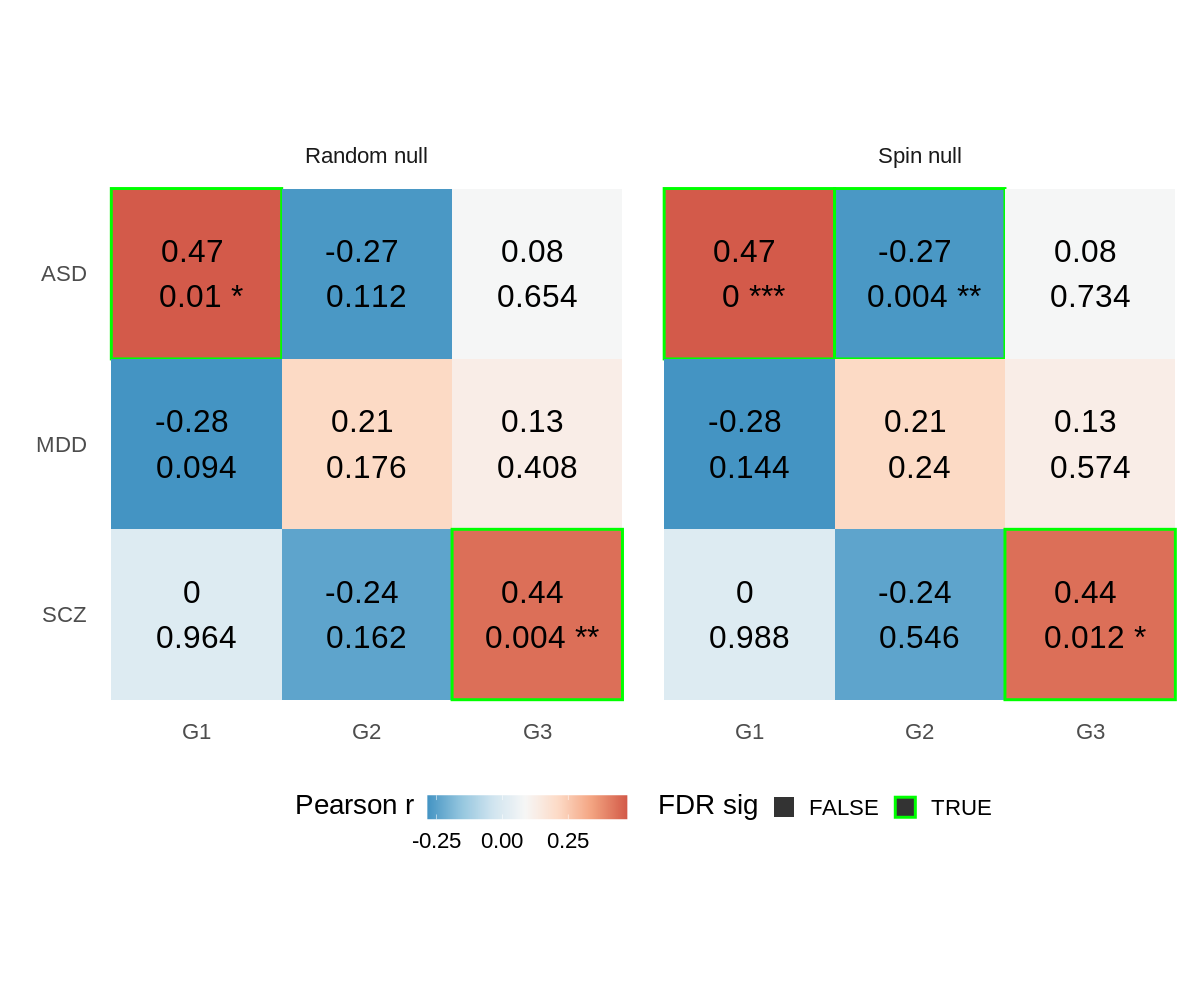

In [40]:
%%R -i corr_versions -i maps -i dk_scores -w 12 -h 10 --units in -r 100
source("../code/plot_maps.R")
plot_corr_versions_2(corr_versions, size=8)

In [50]:
maps_scatter = (maps
                .melt(ignore_index=False, var_name='map', value_name='map_score')
                .join(scores.set_index('label')).reset_index()
               )
maps_scatter_corrs = (corr_versions.loc[lambda x: x['version']=='Spin null']
                      .loc[:,['map','G','true_mean','q']]
                     )

In [54]:
maps_scatter_corrs

map   G  true_mean        q
0  ASD  G1   0.473484  0.00000
1  ASD  G2  -0.274458  0.01800
2  ASD  G3   0.081860  0.82575
3  MDD  G1  -0.283795  0.32400
4  MDD  G2   0.214388  0.43200
5  MDD  G3   0.129684  0.73800
6  SCZ  G1   0.003600  0.98800
7  SCZ  G2  -0.242288  0.73800
8  SCZ  G3   0.435329  0.03600

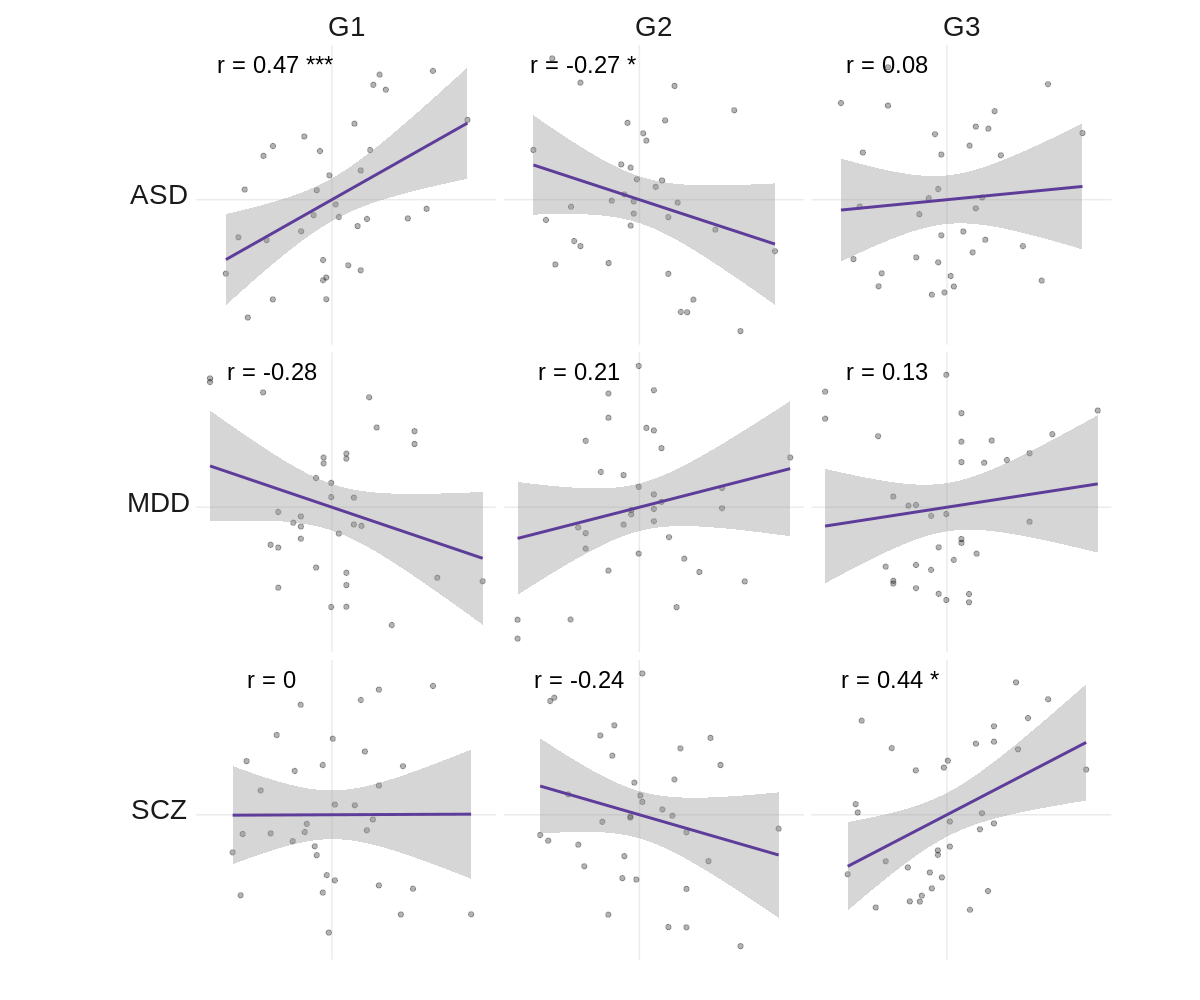

In [55]:
%%R -i maps_scatter -i maps_scatter_corrs -w 12 -h 10 --units in -r 100
source("../code/plot_maps.R")
plot_maps_scatter(maps_scatter, maps_scatter_corrs)

---

## Compare DK maps

In [134]:
dk_scores_dict = {
    'dm_dk_ds9': dm_dk_ds9.clean_scores(),
    'pca_dk_ds9': pca_dk_ds9.clean_scores(),
    'dm_hcp_ds9': dm_dk_ds9.score_from(dm_hcp_ds9),
    'dm_hcp_ds9_vertices': dm_hcp_ds9.score_in_dk(),
    'dm_hcp_3d_ds5': dm_dk_ds9.score_from(dm_hcp_3d_ds5),
    'dm_hcp_3d_ds5_vertices': dm_hcp_3d_ds5.score_in_dk()
}

dk_scores = (pd.concat(dk_scores_dict)
             .reset_index(0)
             .rename({'level_0':'version'}, axis=1)
            )

In [136]:
for name, scores in {name:scores for name,scores in dk_scores_dict.items() if 'vertices' in name}.items():
    generate_simulations(scores.set_index('label'), n=1000, outfile=f'../outputs/permutations/sim_gradients_dk_1000_{name}.npy', atlas='dk')
    print(f'Made simulations for {name}')

Made simulations for dm_hcp_ds9_vertices
Made simulations for dm_hcp_3d_ds5_vertices


In [181]:
null_corrs_dict = {}
for name, scores in dk_scores_dict.items():
    sim_grads = np.load(f"../outputs/permutations/sim_gradients_dk_1000_{name}.npy")
    null_corrs_dict[name] = corr_nulls_from_grads(sim_grads, scores, maps, method='pearson')

In [191]:
null_corrs_dict = {}
for name, scores in dk_scores_dict.items():
    sim_disorders = np.load(f"../outputs/permutations/sim_disorders_dk_5000.npy")
    null_corrs_dict[name] = corr_nulls_from_maps(sim_disorders, scores, maps, method='pearson')

In [182]:
corr_versions = {}
for name, scores in dk_scores_dict.items():
    corrs = get_corrs(scores, maps, atlas='dk')#.loc[lambda x: ~np.isin(x.index, ['ANX', 'MCI', 'ADHD'])]
    null_corrs = null_corrs_dict[name]#.loc[lambda x: ~np.isin(x['map'], ['ANX', 'MCI', 'ADHD'])]
    corr_versions[name] = get_null_p(corrs, null_corrs, adjust='fdr_bh')

names_dict = {
    'dm_dk_ds9': 'DM DK DS9',
    'pca_dk_ds9': 'PCA DK DS9',
    'dm_hcp_ds9': 'DM HCP DS9 \n-> DK (weights)',
    'dm_hcp_ds9_vertices': 'DM HCP DS9 \n-> DK (vertices)',
    'dm_hcp_3d_ds5': 'DM HCP 3+ DS5 \n-> DK (weights)',
    'dm_hcp_3d_ds5_vertices': 'DM HCP 3+ DS5 \n-> DK (vertices)'
}
    
corr_versions = pd.concat(corr_versions).reset_index(0).rename({'level_0':'version'},axis=1) \
        .assign(version = lambda x: pd.Categorical(x['version'].replace(names_dict), ordered=True, categories=names_dict.values()))

maps_plot = maps

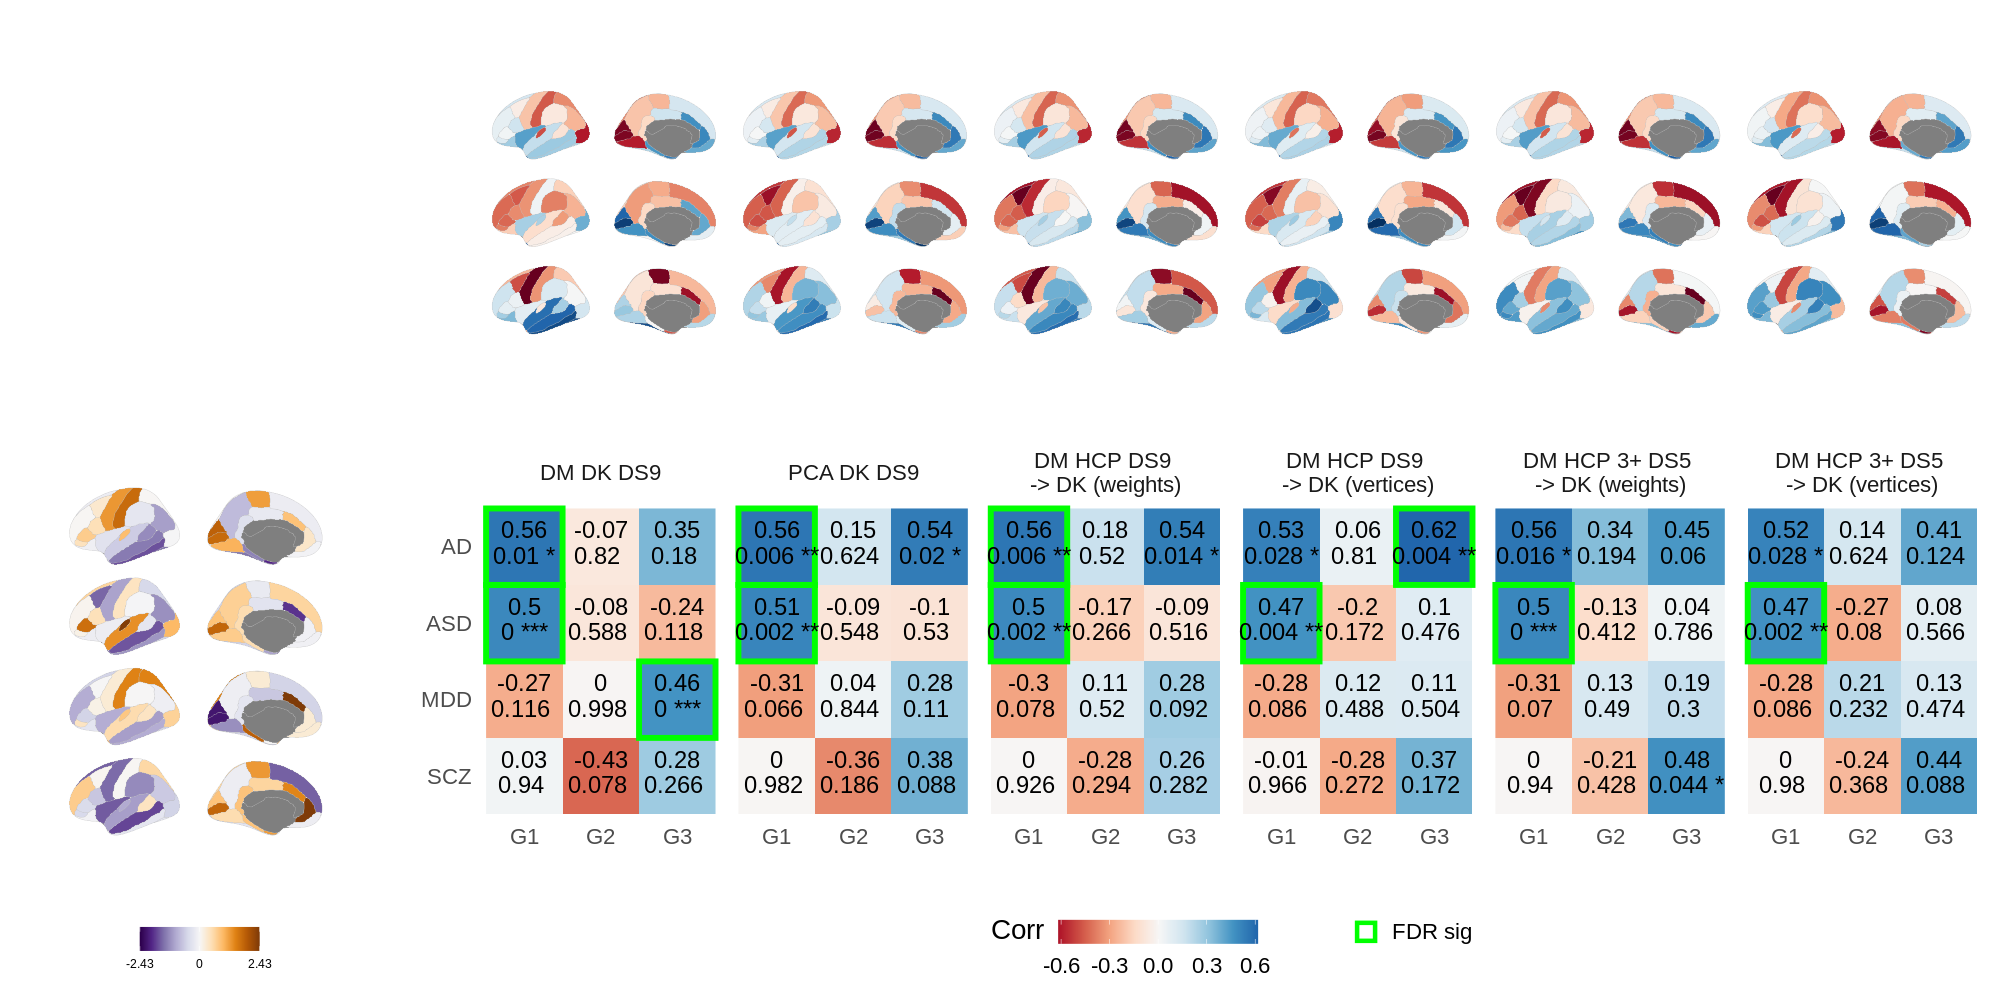

In [185]:
%%R -i corr_versions -i maps_plot -i dk_scores -w 20 -h 10 --units in -r 100
source("../code/plot_maps.R")
g1 <- plot_dk(dk_scores) + theme(strip.text.y=element_blank(), strip.text.x=element_blank()) + guides(fill='none')
g2 <- plot_corr_versions(corr_versions) #+ ggtitle('DK map versions')
g3 <- plot_maps_dk(maps_plot, ncol=1, colors=rev(brewer.puor(100))) + theme(strip.text.x=element_blank())

layout <- c(
  area(t = 1, b = 1, l = 3, r = 10),
  area(t = 2, b = 2, l = 3, r = 10),
  area(t = 2, b = 2, l = 1, r = 2)
)

plot <- g1 + g2 + g3 + plot_layout(design=layout)

plot #& theme(plot.margin=margin(0,0,0,0))

In [186]:
g = (dk_scores
 .set_index(['version', 'label'])
 # .loc['dm_hcp_3d_ds5_vertices']
 .loc['dm_hcp_3d_ds5_vertices']
 .join(maps)
)

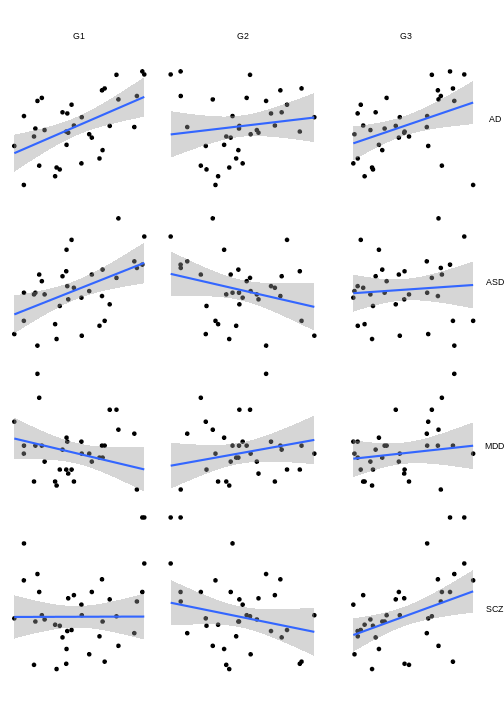

In [189]:
%%R -i g -w 7 -h 10 --units in
g %>%
gather(map, map_score, -(G1:G3)) %>%
gather(G, G_score, -map, -map_score) %>%
ggplot(aes(x=G_score, y=map_score)) + 
facet_grid(map ~ G) +
geom_point() + theme_void() + geom_smooth(method='lm') + 
theme(aspect.ratio=1)

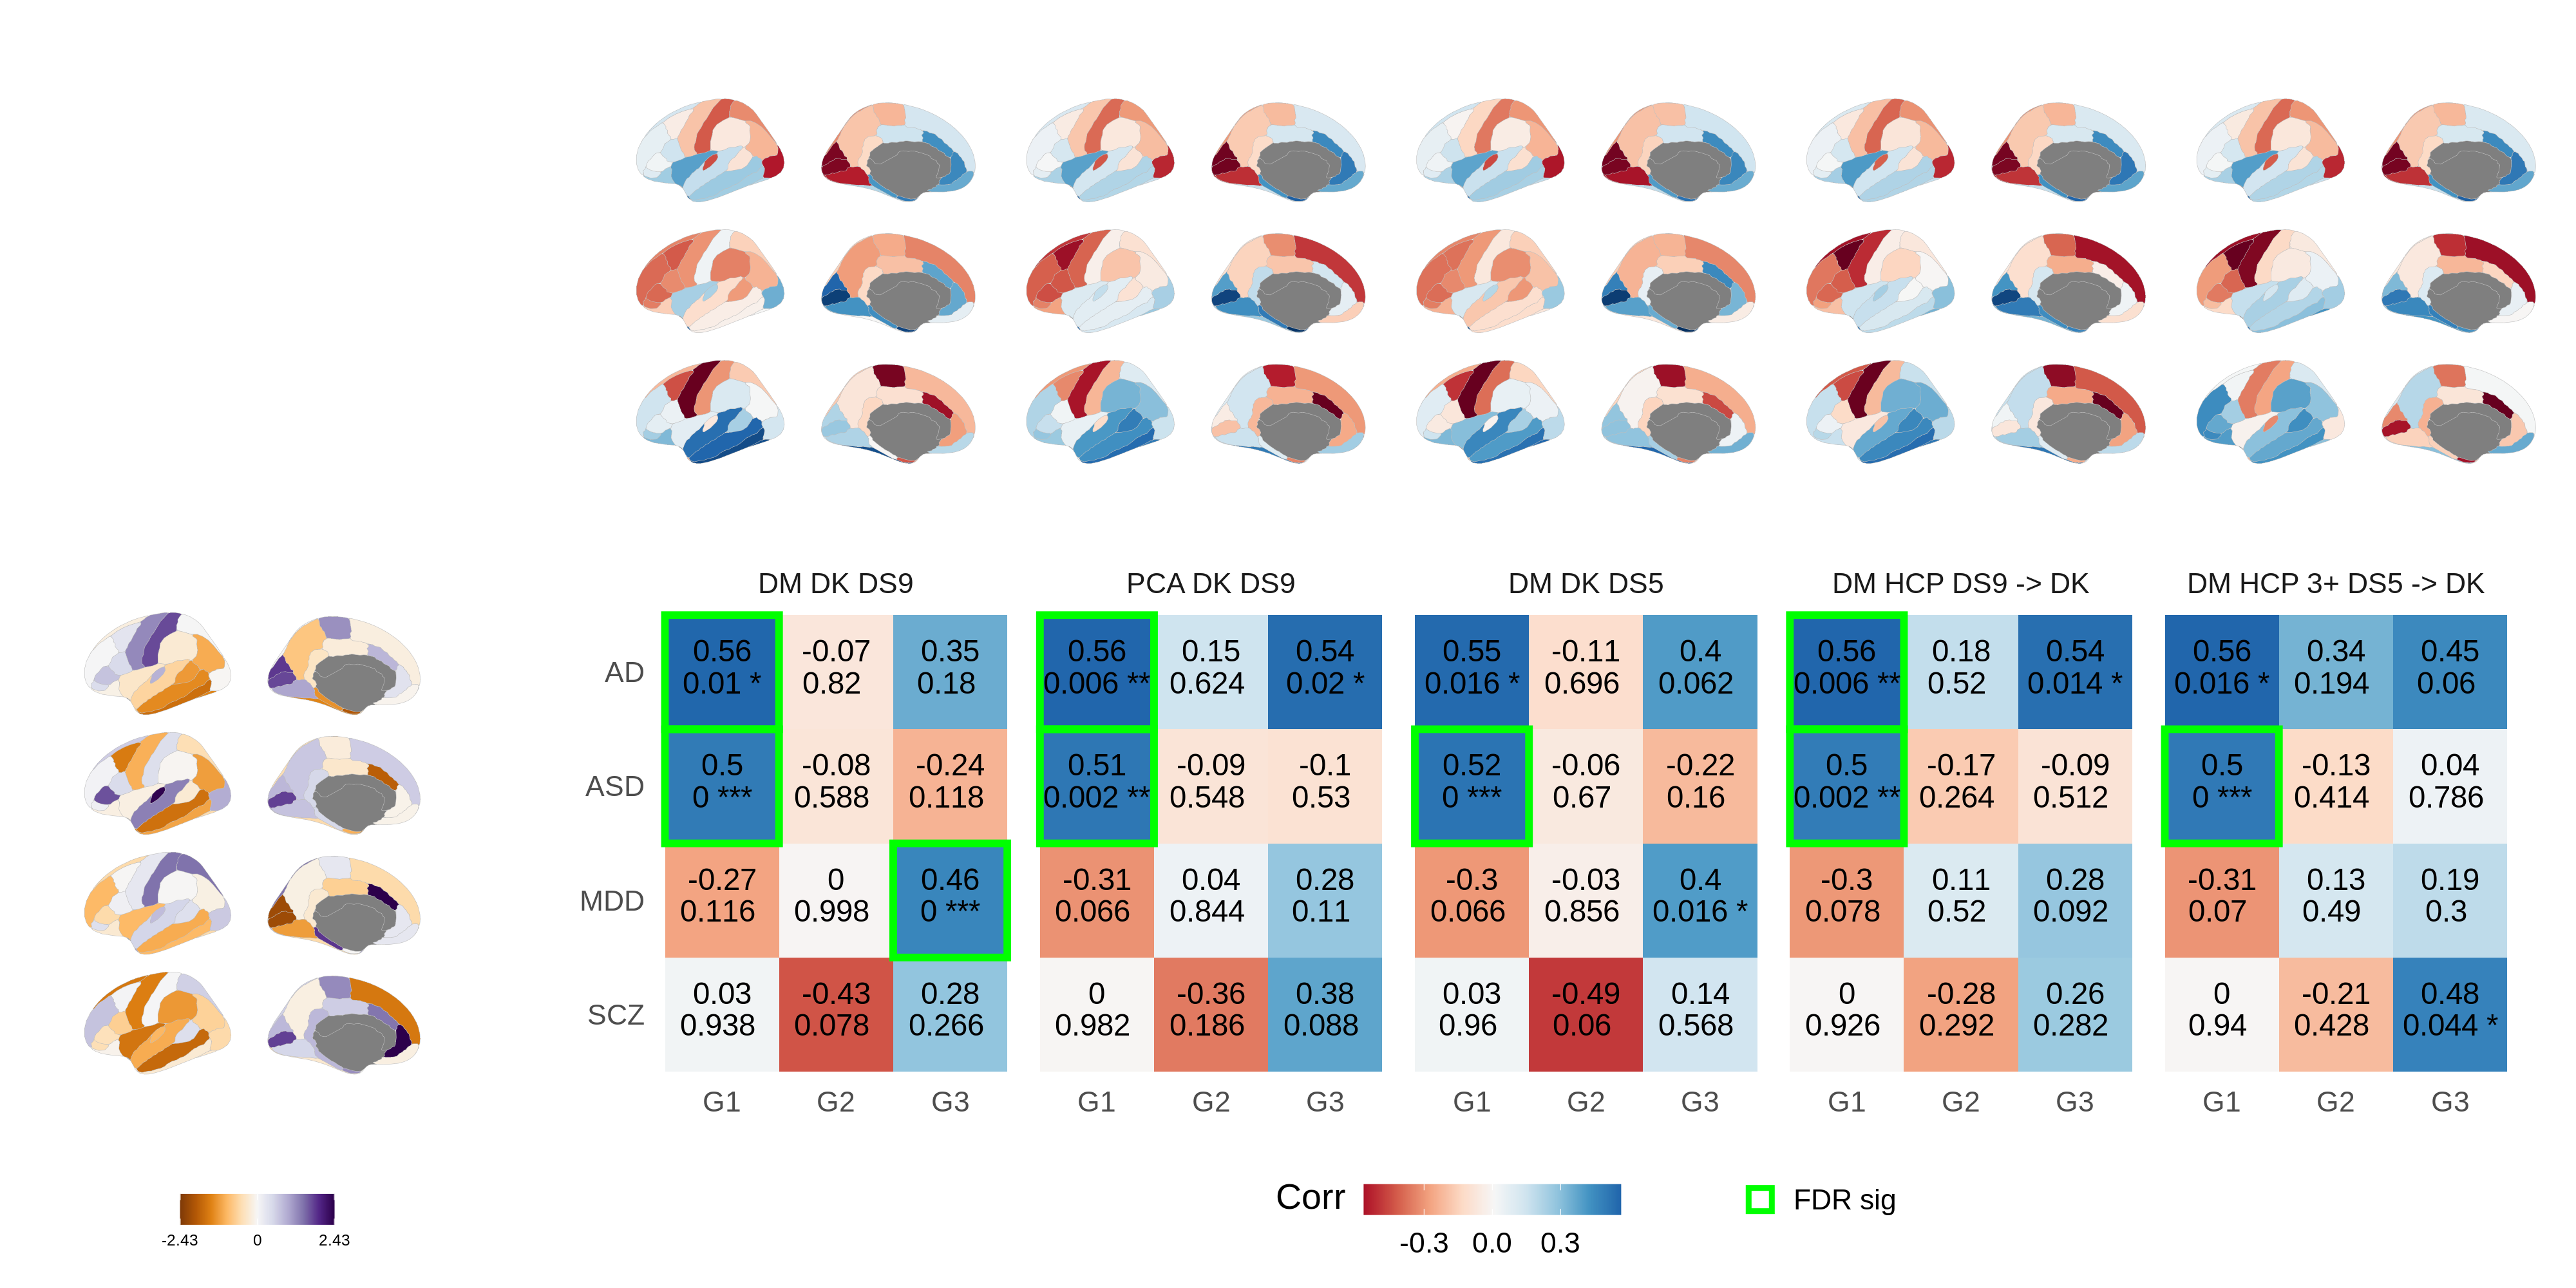

In [21]:
%%R -i corr_versions -i maps_plot -i dk_scores -w 20 -h 10 --units in -r 200
source("../code/plot_maps.R")
g1 <- plot_dk(dk_scores) + theme(strip.text.y=element_blank(), strip.text.x=element_blank()) + guides(fill='none')
g2 <- plot_corr_versions(corr_versions) #+ ggtitle('DK map versions')
g3 <- plot_maps_dk(maps_plot, ncol=1, colors=brewer.puor(100)) + theme(strip.text.x=element_blank())

layout <- c(
  area(t = 1, b = 1, l = 3, r = 10),
  area(t = 2, b = 2, l = 3, r = 10),
  area(t = 2, b = 2, l = 1, r = 2)
)

plot <- g1 + g2 + g3 + plot_layout(design=layout)

plot #& theme(plot.margin=margin(0,0,0,0))

---

## Biplot

In [421]:
corr = (corr_versions
        .loc[lambda x: x['version'] == 'DM HCP 3+ DS5 -> DK']
        .loc[:, ['G','map','z']]
        .pivot(index='map',columns='G', values='z')
       )
corr

G          G1        G2        G3
map                              
AD   2.203900  1.340679  1.818634
ASD  3.441122 -0.790134  0.295433
MDD -1.772213  0.727133  1.054310
SCZ -0.080397 -0.856339  1.918507

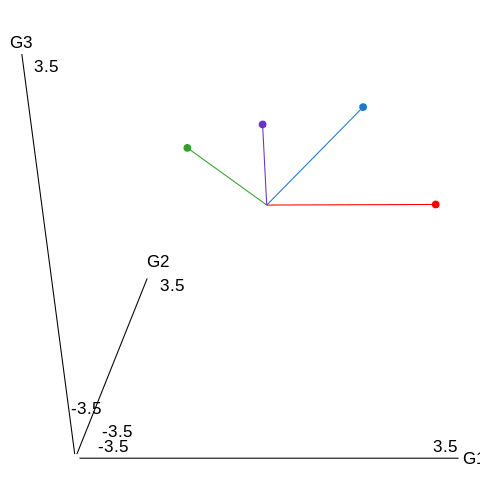

In [422]:
%%R -i corr
library(gg3D)

corr <- corr %>% round(2) %>% rownames_to_column('d')
corr_zero <- corr %>% mutate(across(G1:G3, ~ 0))
axes_pos <- corr %>% mutate(d = '_axes') %>% mutate(across(G1:G3, ~ 3.5))
axes_neg <- corr %>% mutate(d = '_axes') %>% mutate(across(G1:G3, ~ -3.5))
axes <- rbind(axes_pos, axes_neg)
corr_plot <- rbind(corr, corr_zero, axes)
# corr_bg <- rbind(corr, corr %>% mutate(across(G2, ~ -10*.x)))

# theta <- 170
theta <- 0
phi <- 20

g1 <- ggplot(corr_plot, aes(x=G1, y=G2, z=G3, color=d)) +
axes_3D(theta=theta, phi=phi) + 
stat_3D(geom='line', theta=theta, phi=phi) +
# stat_3D(data=corr,
#     geom='point', size=3, theta=theta, phi=phi) +
stat_3D(data=rbind(corr, axes), geom='point', size=3, theta=theta, phi=phi) +
scale_color_manual(values=c('white', cols25(4))) +
axis_labs_3D(theta=theta, phi=phi, size=6,
       hjust=c(1,0.5, -0.5,-0.5, -0.5,0), 
       vjust=c(-0.5,-0.5, 1,0.5, 1.5,-1)) +
labs_3D(theta=theta, phi=phi, size=6,
       labs=c('G1','G2','G3'),
       hjust=c(-0.2,0,0.5), vjust=c(0.5,-1,-0.5)) +
theme_void() + 
theme(legend.position = "none")
g1

In [423]:
%%R -i corr
corr <- corr %>% rownames_to_column('d')
df <- rbind(
    corr %>% select(d, x=G1, y=G3) %>% mutate(which='G1 v G3'),
    corr %>% select(d, x=G1, y=G2) %>% mutate(which='G1 v G2'),
    corr %>% select(d, x=G2, y=G3) %>% mutate(which='G2 v G3')
) %>%
mutate(which = factor(which, ordered=T, levels=unique(.$which)))

df_labs <- rbind(
    data.frame(x=c(-3.5, -0.5), y=c(0.5, 3.5), label=c('G1', 'G3'), which='G1 v G3'),
    data.frame(x=c(-3.5, -0.5), y=c(0.5, 3.5), label=c('G1', 'G2'), which='G1 v G2'),
    data.frame(x=c(-3.5, -0.5), y=c(0.5, 3.5), label=c('G2', 'G3'), which='G2 v G3')
) %>%
mutate(which = factor(which, ordered=T, levels=unique(.$which)))

lim <- 3.5

g2 <- ggplot(df) + 
facet_wrap(~which, ncol=1) + 
geom_hline(yintercept=0) + geom_vline(xintercept=0) +
geom_segment(aes(x=0,y=0,xend=x,yend=y, color=d)) +
geom_point(aes(x,y, color=d)) +
geom_text(data=df_labs, aes(x=x,y=y,label=label), size=6) +
annotate(geom='text', x=3.5, y=0.5, label='3.5', size=6) +
annotate(geom='text', x=0.5, y=-3.5, label='-3.5', size=6) +
scale_x_continuous(limits=c(-lim,lim)) + 
scale_y_continuous(limits=c(-lim,lim)) +
scale_color_manual(values=cols25(4), name='Disorder') +
coord_cartesian(clip='off') +
theme_void() + 
theme(aspect.ratio=1,
      panel.spacing=unit(2,'lines'),
      strip.text=element_blank(),
      legend.position='left'
     )

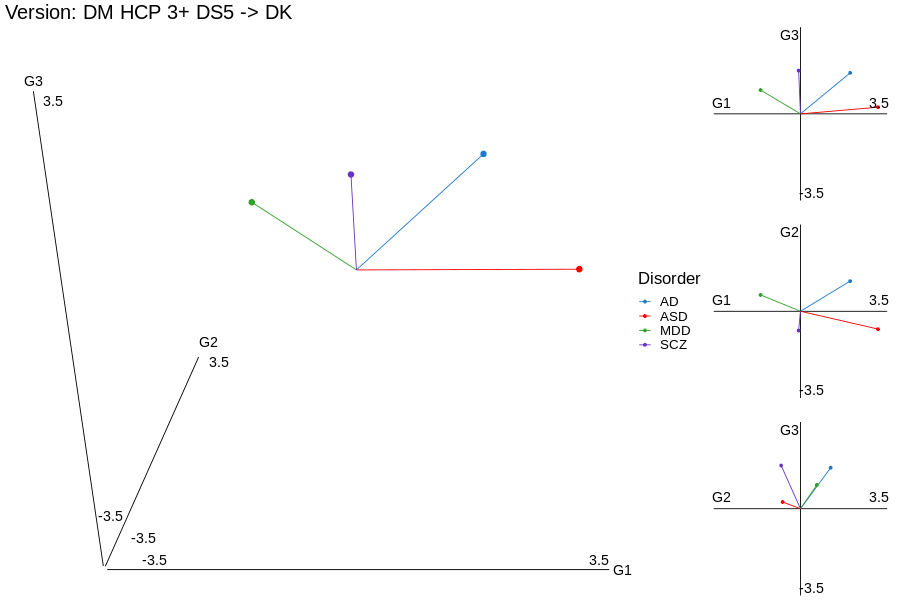

In [424]:
%%R -w 15 -h 10 --units in -r 60
layout <- c(
    area(t=1,b=10,l=1,r=10),
    area(t=1,b=10,l=11,r=13)
)

plot <- g1 + g2 + plot_layout(design=layout)
themed <- plot & theme(text=element_text(size=20))
annotated <- themed + plot_annotation(title='Version: DM HCP 3+ DS5 -> DK')
annotated

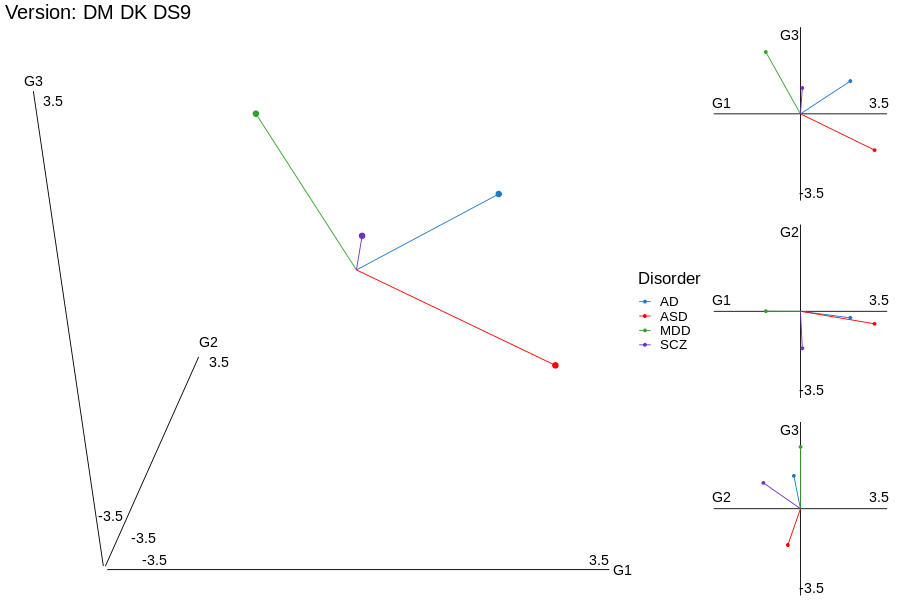

In [418]:
%%R -w 15 -h 10 --units in -r 60
layout <- c(
    area(t=1,b=10,l=1,r=10),
    area(t=1,b=10,l=11,r=13)
)

plot <- g1 + g2 + plot_layout(design=layout)
themed <- plot & theme(text=element_text(size=20))
annotated <- themed + plot_annotation(title='Version: DM DK DS9')
annotated

---

## Compare p value methods

In [7]:
get_corrs(scores, maps, atlas='dk')

G1        G2        G3
AD    0.561727 -0.073557  0.353858
ADHD -0.423903 -0.244077 -0.271206
ANX   0.102682 -0.102086  0.191134
ASD   0.499010 -0.081509 -0.236294
MCI   0.515341 -0.013498  0.228460
MDD  -0.272911 -0.004099  0.464396
SCZ   0.030119 -0.433692  0.283570

In [11]:
# generate_spins(maps, n=5000, outfile="../outputs/permutations/spin_disorders_5000.npy", atlas='dk')
# generate_spins_from_gradients(scores_dm, n=5000, outfile='../outputs/permutations/spin_gradients_dk_5000.npy', atlas='dk')
# generate_spins_from_gradients(scores_pca, n=5000, outfile='../outputs/permutations/spin_gradients_dk_pca_5000.npy', atlas='dk')

# generate_simulations(maps, n=5000, outfile='../outputs/permutations/sim_disorders_dk_5000.npy', atlas='dk')
generate_simulations(scores_dm, n=5000, outfile='../outputs/permutations/sim_gradients_dk_5000.npy', atlas='dk')
generate_simulations(scores_pca, n=5000, outfile='../outputs/permutations/sim_gradients_dk_pca_5000.npy', atlas='dk')


TypeError: expected str, bytes or os.PathLike object, not numpy.ndarray

In [12]:
spin_maps = np.load("../outputs/permutations/spin_disorders_5000.npy")
spin_grads = np.load("../outputs/permutations/spin_gradients_dk_5000.npy")
# spin_grads = np.load("../outputs/permutations/spin_gradients_dk_pca_5000.npy")
sim_maps = np.load("../outputs/permutations/sim_disorders_dk_5000.npy")
sim_grads = np.load("../outputs/permutations/sim_gradients_dk_10000.npy")
# sim_grads = np.load("../outputs/permutations/sim_gradients_dk_pca_5000.npy")

In [13]:
scores = scores_dm

In [14]:
null_corrs_dict = {}
null_corrs_dict['spin_maps_p'] = corr_nulls_from_maps(spin_maps, scores, maps, method='pearson')
null_corrs_dict['spin_maps_p_pool'] = corr_nulls_from_maps(spin_maps, scores, maps, method='pearson', pool=True)
null_corrs_dict['spin_grads_p'] = corr_nulls_from_grads(spin_grads, scores, maps, method='pearson')
null_corrs_dict['spin_grads_p_pool'] = corr_nulls_from_grads(spin_grads, scores, maps, method='pearson', pool=True, pool_frac=1)

null_corrs_dict['sim_maps_p'] = corr_nulls_from_maps(sim_maps, scores, maps, method='pearson')
null_corrs_dict['sim_maps_p_pool'] = corr_nulls_from_maps(sim_maps, scores, maps, method='pearson', pool=True)
null_corrs_dict['sim_grads_p'] = corr_nulls_from_grads(sim_grads, scores, maps, method='pearson')
null_corrs_dict['sim_grads_p_pool'] = corr_nulls_from_grads(sim_grads, scores, maps, method='pearson', pool=True, pool_frac=1)

In [15]:
save_pickle(null_corrs_dict, 'null_corrs_dict_disorders')
# save_pickle(null_corrs_dict, 'null_corrs_dict_disorders')
# save_pickle(null_corrs_dict, 'null_corrs_dict_disorders_pca')
# null_corrs_dict = load_pickle('null_corrs_dict_disorders')

In [16]:
corrs = get_corrs(scores, maps, atlas='dk')
corr_versions = {version:get_null_p(corrs, null_corrs, adjust='fdr_bh') 
                 for version, null_corrs in null_corrs_dict.items()}
corr_versions = pd.concat(corr_versions).reset_index(0).rename({'level_0':'version'},axis=1)

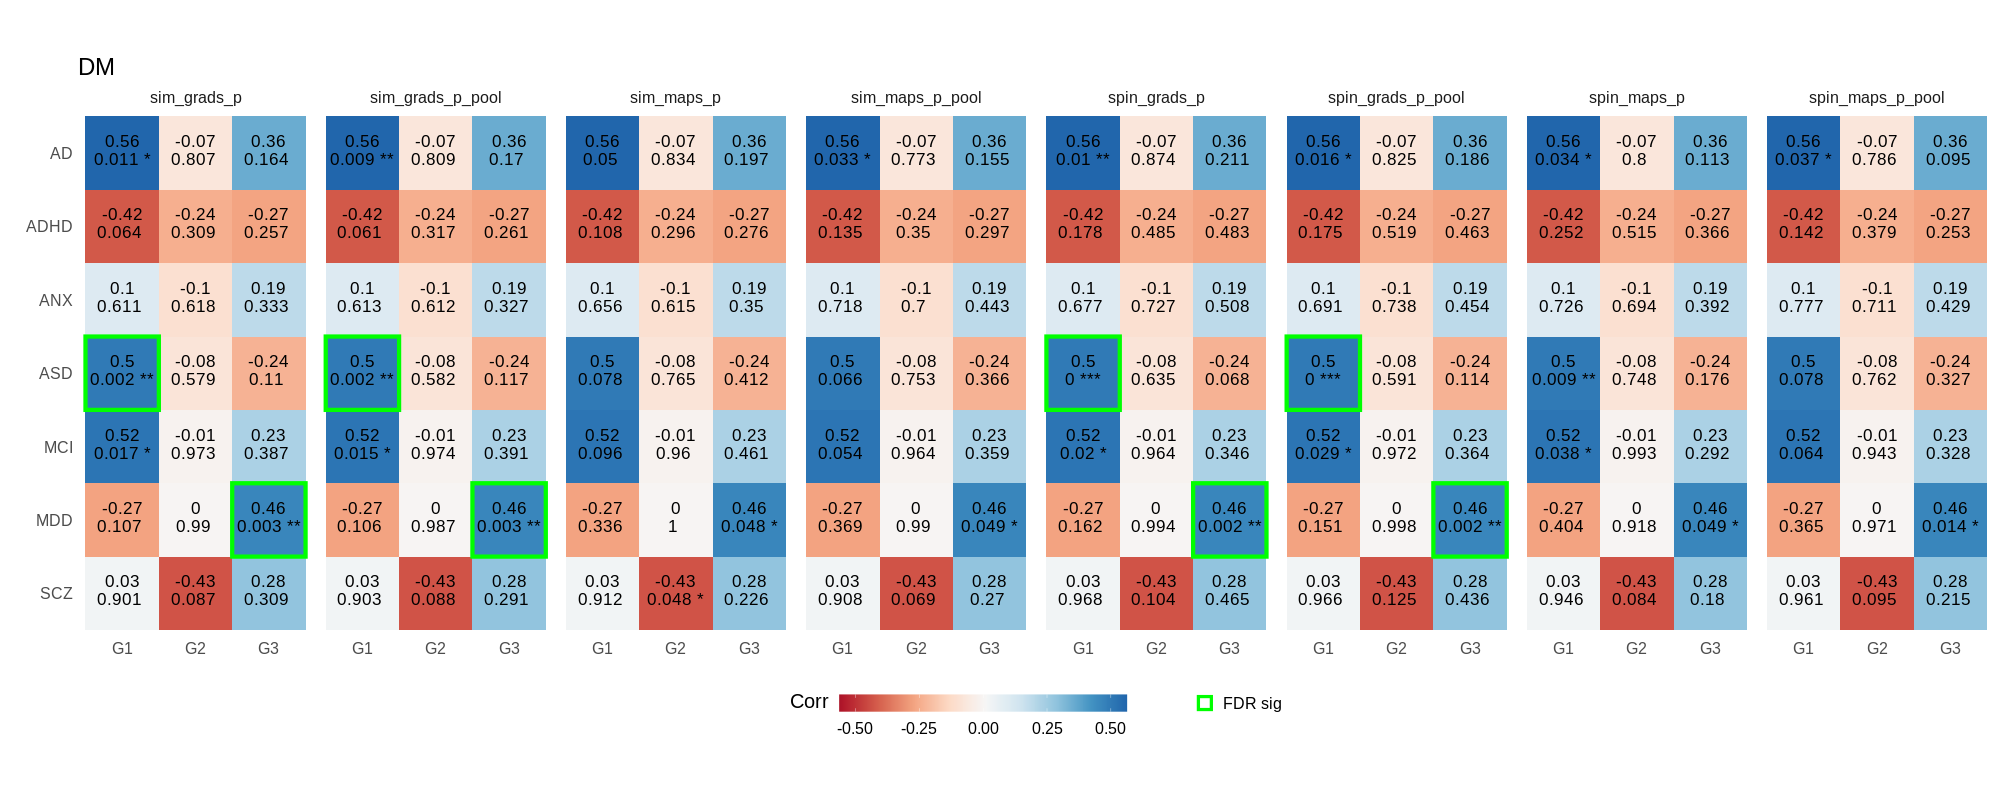

In [19]:
%%R -i corr_versions -w 2000 -h 800
source("../code/plot_maps.R")
plot_corr_versions(corr_versions) + ggtitle('DM')

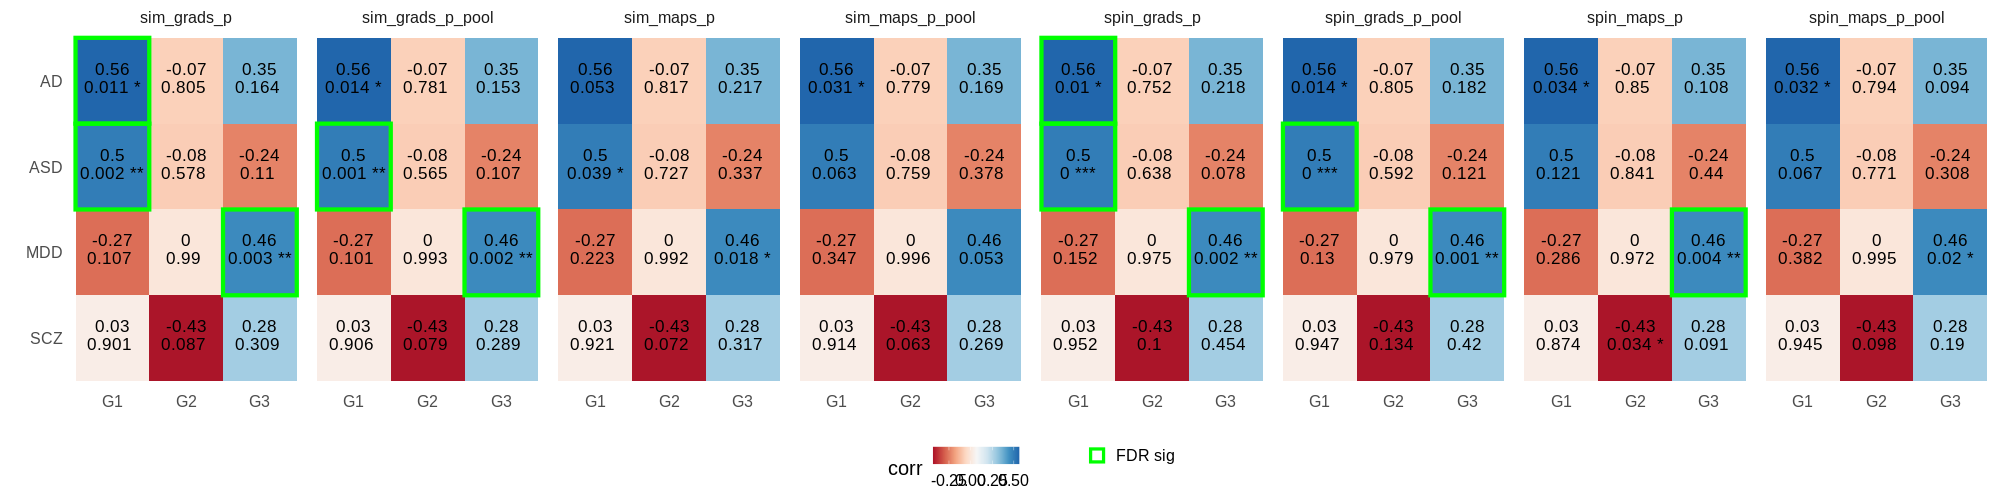

In [15]:
%%R -i corr_versions -w 2000 -h 500
source("../code/plot_maps.R")
plot_corr_versions(corr_versions)

In [23]:
corrs = get_corrs(scores, maps, atlas='dk')
null_corrs = null_corrs_dict['sim_grads_p']
null_p = get_null_p(corrs, null_corrs, adjust=None)
null_p

map   G     pct  true_mean  null_mean  null_std         z    pos       p  \
0     AD  G1  0.9947   0.561929  -0.005989  0.259345  2.189810   True  0.0106   
1     AD  G2  0.4034  -0.074033  -0.000899  0.249010 -0.293700  False  0.8068   
2     AD  G3  0.9182   0.355224  -0.002631  0.249773  1.432724   True  0.1636   
3   ADHD  G1  0.0319  -0.423869   0.005280  0.236286 -1.816229  False  0.0638   
4   ADHD  G2  0.1547  -0.243877   0.005450  0.232557 -1.072114  False  0.3094   
5   ADHD  G3  0.1286  -0.271090   0.000194  0.231876 -1.169952  False  0.2572   
6    ANX  G1  0.6947   0.102087  -0.000011  0.184454  0.553518   True  0.6106   
7    ANX  G2  0.3089  -0.101832  -0.002299  0.183903 -0.541223  False  0.6178   
8    ANX  G3  0.8337   0.190600   0.003804  0.183319  1.018964   True  0.3326   
9    ASD  G1  0.9989   0.499031  -0.001185  0.150833  3.316351   True  0.0022   
10   ASD  G2  0.2894  -0.082015  -0.000472  0.150866 -0.540502  False  0.5788   
11   ASD  G3  0.0551  -0.235454   0.000562  0.150731 -1.565812  False  0.1102   
12   MCI  G1  0.9913   0.515604  -0.006003  0.249992  2.086492   True  0.0174   
13   MCI  G2  0.4863  -0.013994  -0.001756  0.242222 -0.050523  False  0.9726   
14   MCI  G3  0.8067   0.229687  -0.001930  0.243637  0.950663   True  0.3866   
15   MDD  G1  0.0534  -0.273038  -0.001158  0.171667 -1.583770  False  0.1068   
16   MDD  G2  0.4951  -0.003594  -0.001735  0.171123 -0.010861  False  0.9902   
17   MDD  G3  0.9987   0.463777   0.002923  0.169832  2.713585   True  0.0026   
18   SCZ  G1  0.5495   0.029362  -0.003509  0.251834  0.130524   True  0.9010   
19   SCZ  G2  0.0435  -0.433407  -0.003959  0.252018 -1.704040  False  0.0870   
20   SCZ  G3  0.8455   0.283586   0.000047  0.260945  1.086584   True  0.3090   

      sig  
0    True  
1   False  
2   False  
3   False  
4   False  
5   False  
6   False  
7   False  
8   False  
9    True  
10  False  
11  False  
12   True  
13  False  
14  False  
15  False  
16  False  
17   True  
18  False  
19  False  
20  False

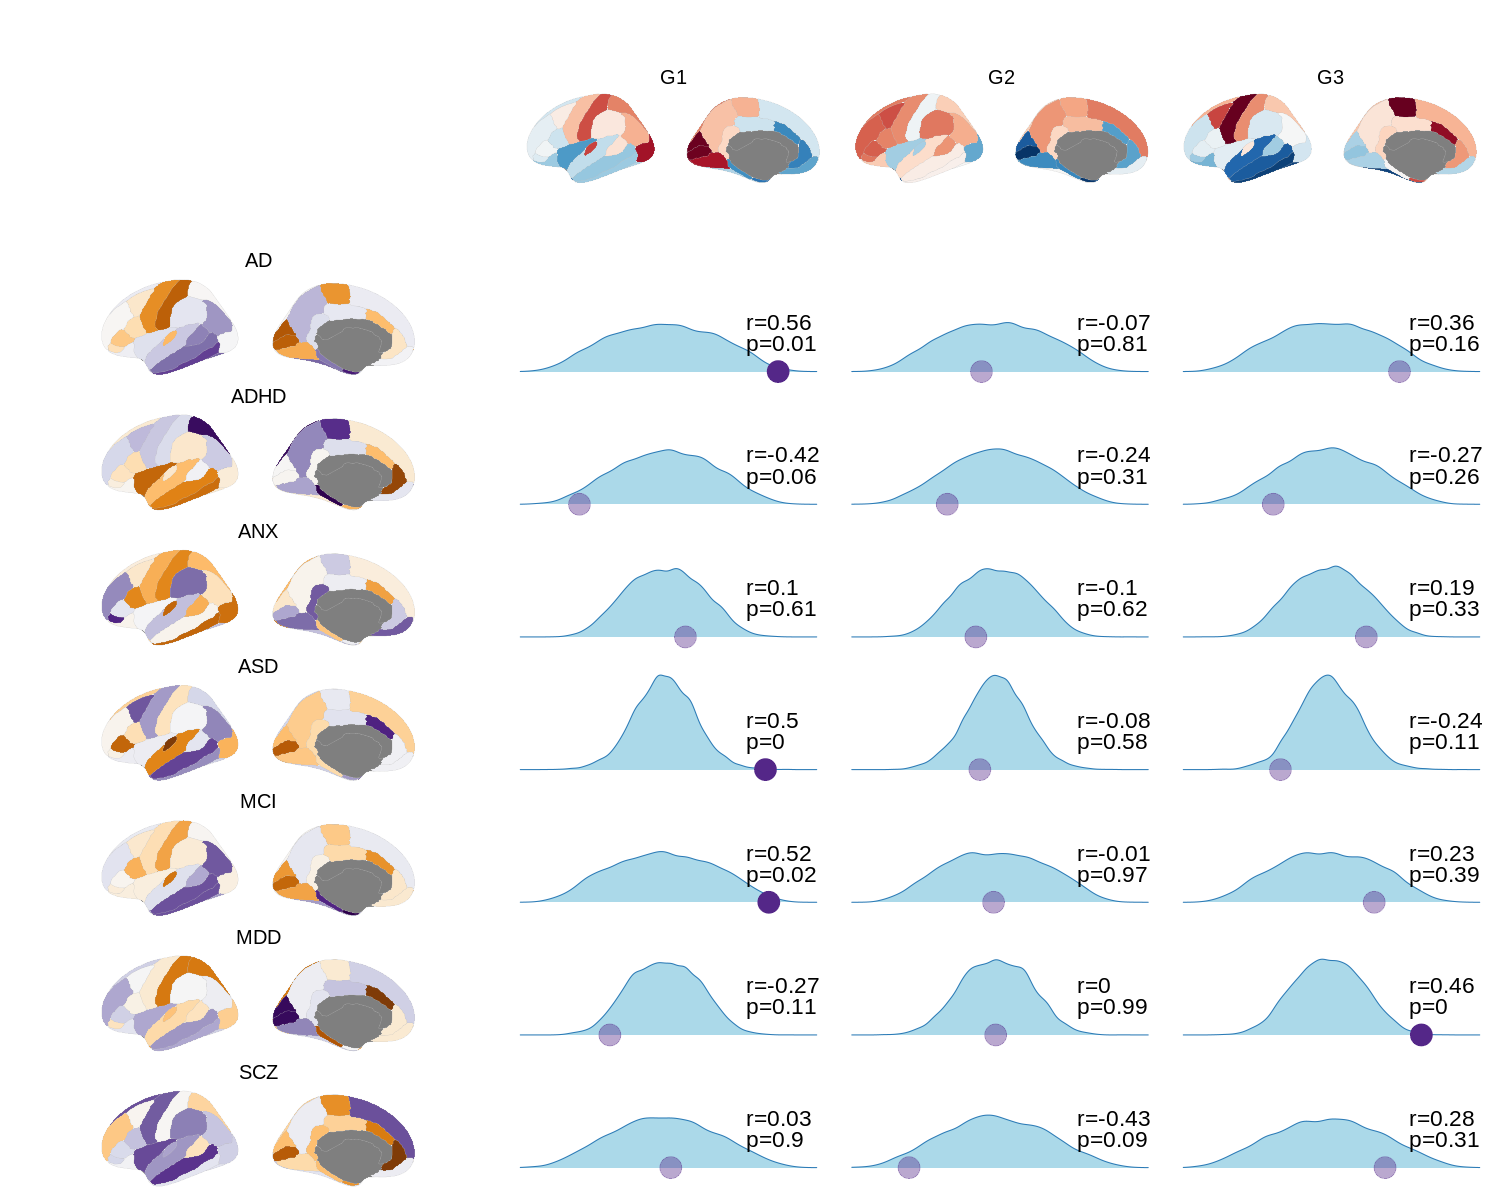

In [28]:
%%R -i corrs -i null_corrs -i null_p -i scores -i maps -w 2000 -h 1200
source("../code/plot_maps.R")
source("../code/brainPlots.R")
g1 <- plot_null_corrs(corrs, null_corrs, null_p)
g2 <- plot_dk_wide(scores, spacing=0) + guides(fill='none')
g3 <- plot_maps_dk(maps, colors=rev(brewer.puor(100)), ncol=1) + guides(fill='none')

(
((
    ((plot_spacer() | g2) + plot_layout(widths=c(1,2))) / 
    ((g3 | g1) + plot_layout(widths=c(1,2)))
) + plot_layout(heights=c(1,7)) 
) & theme(
    text=element_text(size=36),
)
) #+ plot_annotation(title='Sim grads', theme=theme(title=element_text(size=42)))